In [1]:
from models.utils import set_global_seed
set_global_seed(42)
from torchvision import transforms
from torchvision.datasets import FashionMNIST, CIFAR10, CIFAR100, MNIST
from models.cleaner import NoiseCleaner
from models.predictor import Predictor

# Instance Independent

In [7]:
train_dataset = FashionMNIST(root='data', train=True, download=True)
transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=3),
            transforms.Resize((224, 224)),
            transforms.ToTensor()
        ])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='iin', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", folds_num=5, model='resnet18', train_noise_level=0.2, epochs_num=20, transform=transform)

TypeError: NoiseCleaner.__init__() got an unexpected keyword argument 'folds_num'

In [ ]:
noise_cleaner.clean()

Training fold 1/5...


Epoch 0/20:   0%|          | 0/20 [00:08<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400, num_epochs=50)

In [ ]:
predictor.train(10)

In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:10<00:00,  2.49it/s]

Test Accuracy: 92.33%


0.9233

# Instance Dependent

## FMnist

In [3]:
train_dataset = FashionMNIST(root='data', train=True, download=False)
transform = transforms.Compose([
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                # transforms.RandomCrop(size=32, padding=4),
                                # transforms.RandomHorizontalFlip(),
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='wresnet50', train_noise_level=0.2, epochs_num=100, train_pairs=20000, 
                             val_pairs=10000, embedding_dimension=128, lr=1e-3, optimizer='Adam', patience=10, transform=transform,
                             weight_decay=0.0001, training_batch_size=1024, pre_trained=False, dropout_prob=0.2, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce')

Seed: 78


KeyboardInterrupt: 

handling big fold 1/10
number_of_pairs: 4309
Training fold 1/10...


Epoch 10/100:  11%|█         | 11/100 [04:45<38:29, 25.94s/it, val_loss=4.7, val_accuracy=10.6, train_loss=4.7, best_accuracy=10.9]

Early stopping triggered
Loading best model from checkpoint...


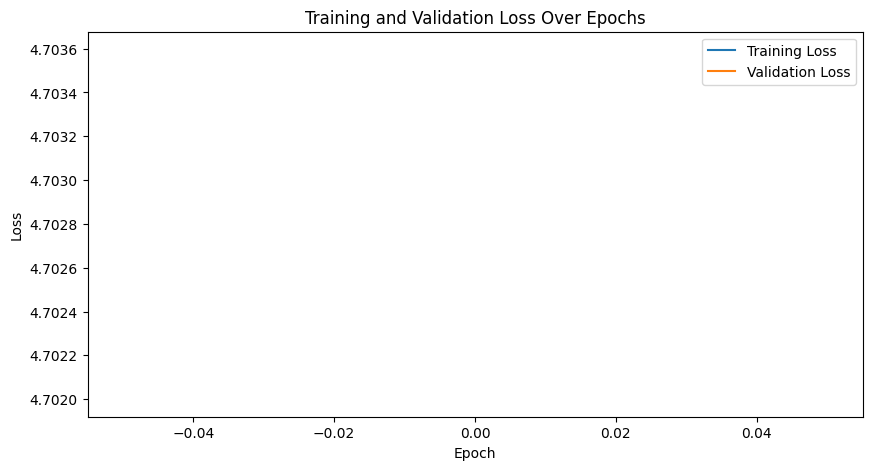

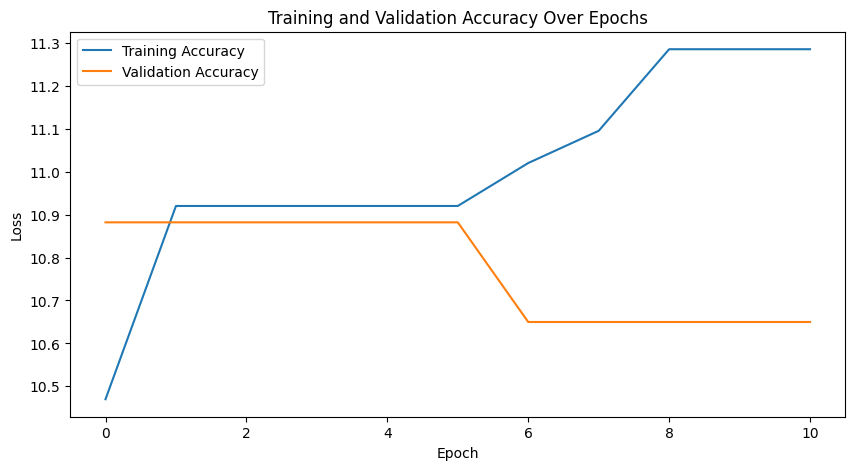

Extracting Embeddings: 100%|██████████| 485/485 [00:06<00:00, 69.79it/s]


Distance between embedding 6589 and 2885: 0.0031
Distance between embedding 6589 and 4016: 0.0037
Distance between embedding 6589 and 5862: 0.0039
Distance between embedding 6589 and 3761: 0.0016
Distance between embedding 6589 and 2201: 0.0011
Distance between embedding 6589 and 6468: 0.0009
Distance between embedding 6589 and 3726: 0.0013
Distance between embedding 6589 and 5161: 0.0011
Distance between embedding 6589 and 1572: 0.0013
Distance between embedding 6589 and 4632: 0.0019
Distance between embedding 6589 and 1639: 0.0010
Distance between embedding 6589 and 399: 0.0013
Distance between embedding 6589 and 1987: 0.0009
Distance between embedding 6589 and 7109: 0.0010
Distance between embedding 6589 and 5832: 0.0011
Distance between embedding 6589 and 6283: 0.0049
Distance between embedding 6589 and 6233: 0.0047
Distance between embedding 6589 and 354: 0.0022
Distance between embedding 6589 and 3924: 0.0028
Distance between embedding 2885 and 4016: 0.0023
Distance between embed

Testing: 100%|██████████| 485/485 [00:06<00:00, 75.06it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 10.88%
Test Precision: 0.01
Test Recall: 0.11
Test F1 Score: 0.02
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 29/100:  29%|██▉       | 29/100 [12:49<31:24, 26.54s/it, val_loss=3.44, val_accuracy=63.5, train_loss=2.81, best_accuracy=66.8]


KeyboardInterrupt: 

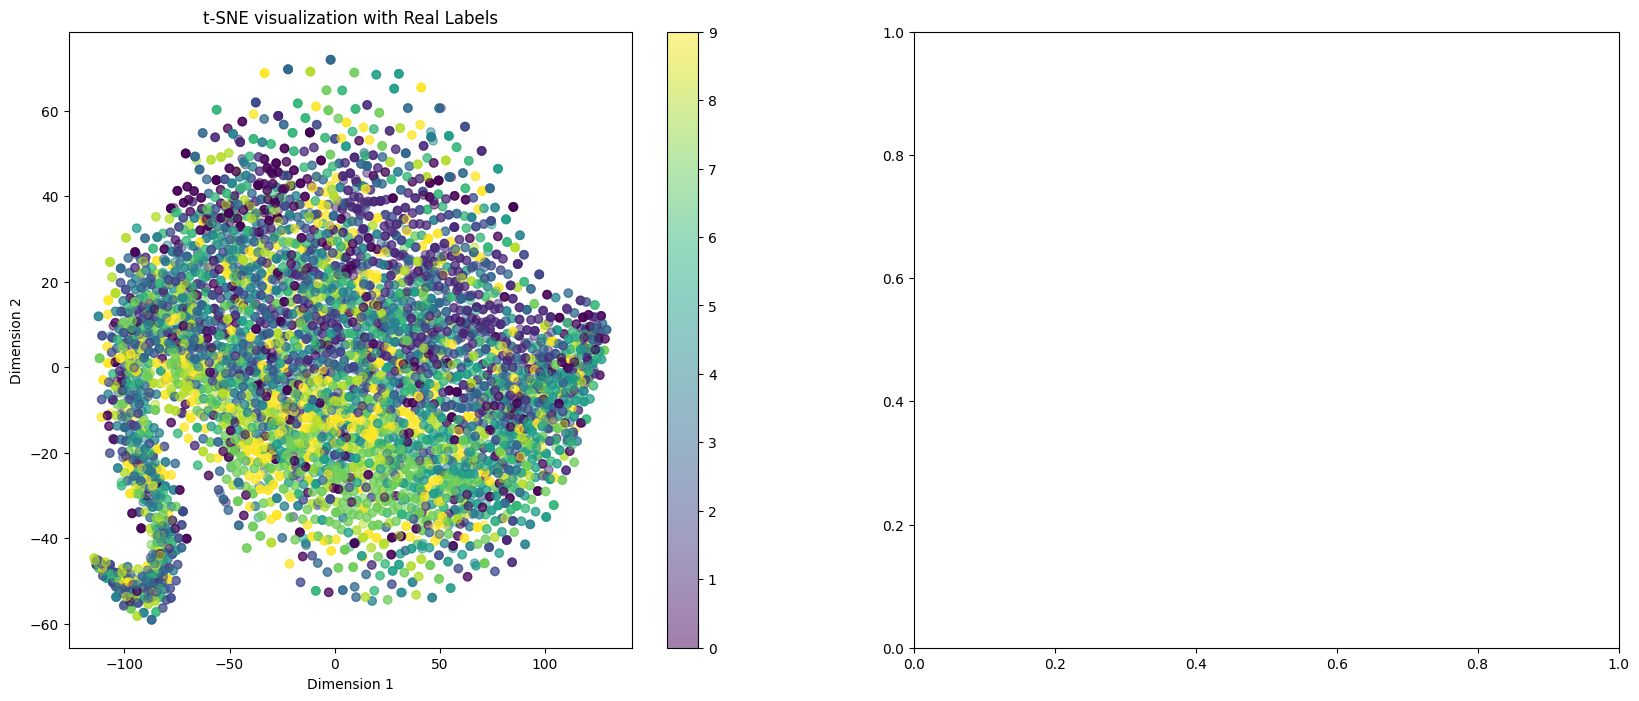

In [ ]:
noise_cleaner.clean()

In [ ]:
import models.predictor
import models
import importlib
importlib.reload(models)
from models import preact
importlib.reload(preact)
from models import predictor
importlib.reload(predictor)
from models.predictor import Predictor

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400)

In [ ]:
predictor.train(10)

Training Epoch 1/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 93.46%
Epoch 1/10, Loss: 0.24129432162879844


Training Epoch 2/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 96.31%
Epoch 2/10, Loss: 0.12274887458940523


Training Epoch 3/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 97.07%
Epoch 3/10, Loss: 0.08064110191390578


Training Epoch 4/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.81%
Epoch 4/10, Loss: 0.07340764353233101


Training Epoch 5/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.51%
Epoch 5/10, Loss: 0.059963096196936294


Training Epoch 6/10: 100%|██████████| 113/113 [01:38<00:00,  1.15it/s]


Validation Accuracy: 97.89%
Epoch 6/10, Loss: 0.0528966288980657


Training Epoch 7/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.85%
Epoch 7/10, Loss: 0.03885995962582858


Training Epoch 8/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.95%
Epoch 8/10, Loss: 0.03452066272760915


Training Epoch 9/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 98.30%
Epoch 9/10, Loss: 0.030963845262551203


Training Epoch 10/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 98.22%
Epoch 10/10, Loss: 0.02610123477282777


In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:11<00:00,  2.25it/s]

Test Accuracy: 90.21%


0.9021

## CIFAR 10

In [ ]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=8, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 10208 out of 50000 data


In [3]:
noise_cleaner.save_noisy_dataset('cleaned', 'dirty')

100%|██████████| 50000/50000 [00:03<00:00, 12964.02it/s]

Noisy dataset saved to cleaned/dirty.pkl


In [5]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
80.21077283372365% accuracy in 854 data
Loaded 854 noisy indices from cifar10/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
79.53488372093022% accuracy in 860 data
Loaded 860 noisy indices from cifar10/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
78.55504587155964% accuracy in 872 data
Loaded 872 noisy indices from cifar10/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
80.02466091245375% accuracy in 811 data
Loaded 811 noisy indices from cifar10/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
80.62770562770562% accuracy in 924 data
Loaded 924 noisy indices from cifar10/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
77.0011273957159% accuracy in 887 data
Loaded 887 noisy indices from cifar10/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
79.57992998833139% accuracy in 857 data
Loaded 857 noisy indices from cifar10/resne

              precision    recall  f1-score   support

       Clean     0.9569    0.9248    0.9406     39792
       Noisy     0.7408    0.8375    0.7862     10208

    accuracy                         0.9070     50000
   macro avg     0.8488    0.8811    0.8634     50000
weighted avg     0.9127    0.9070    0.9090     50000



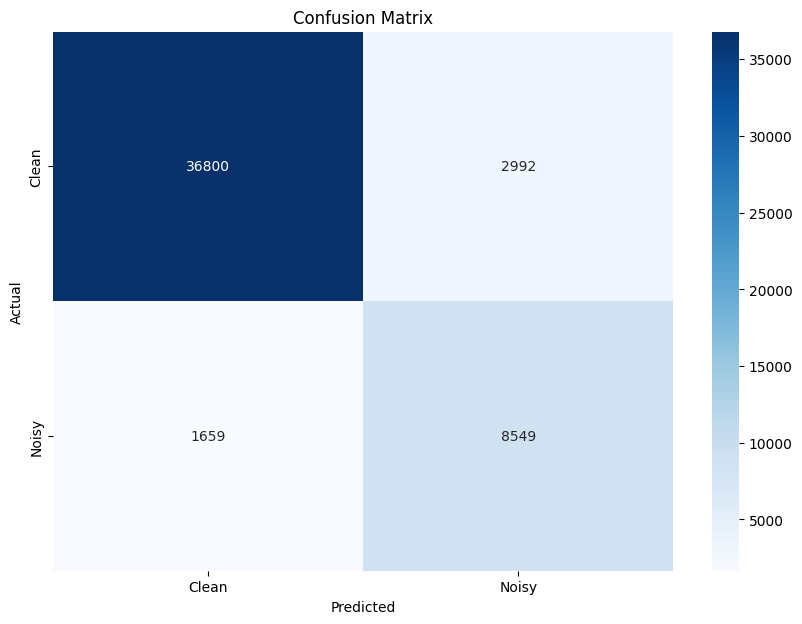

In [9]:
noise_cleaner.report(mistakes_count=9)

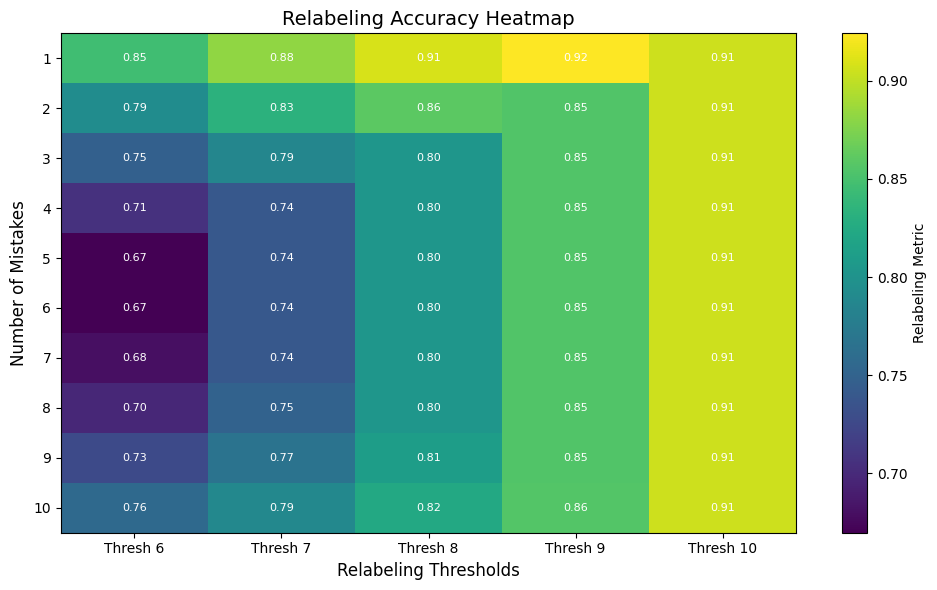

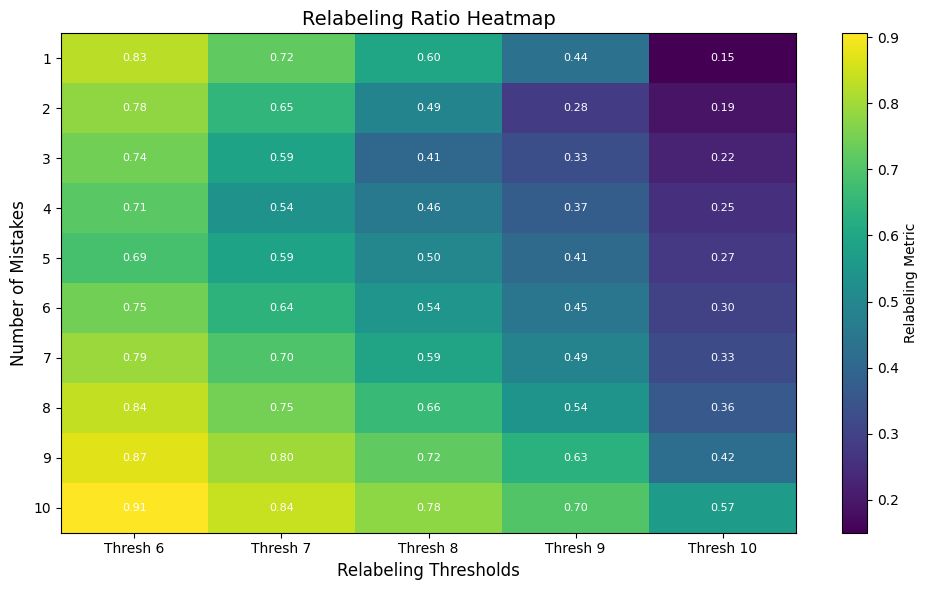

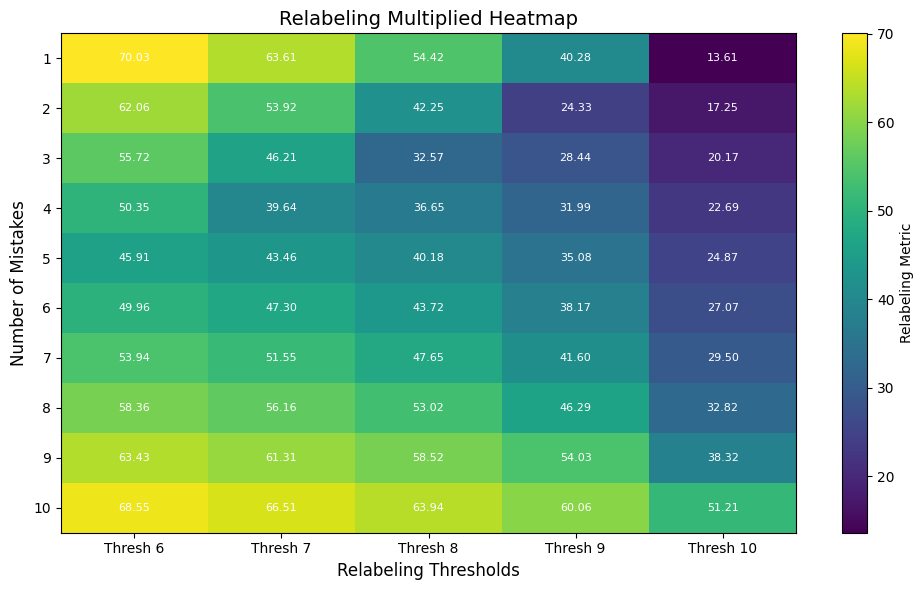

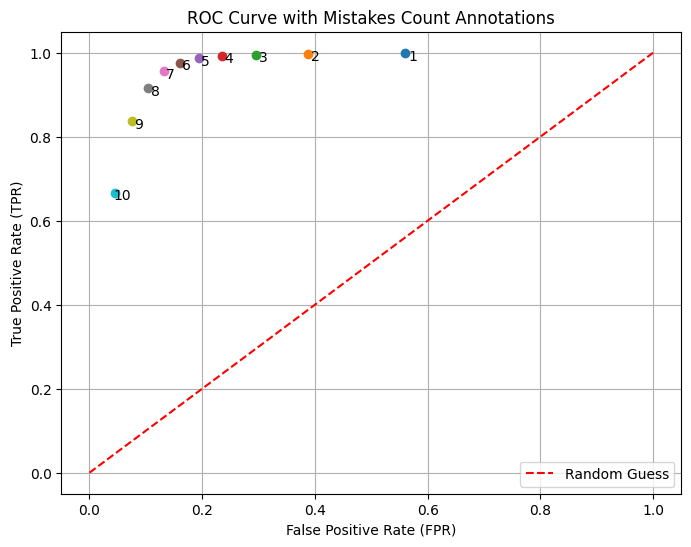

Area Under the Curve (AUC): 0.49907322987450103


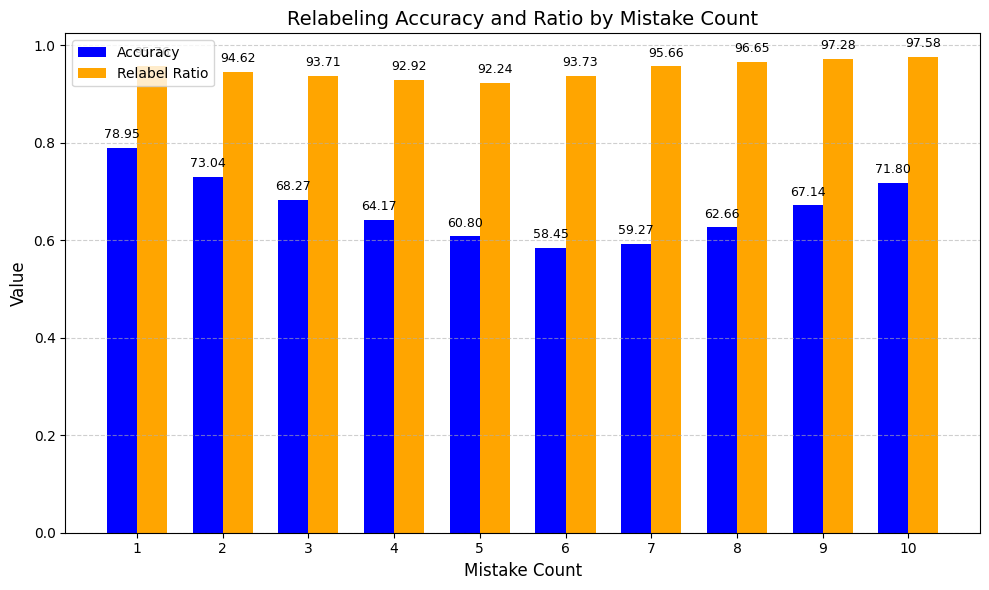

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.9569    0.9248    0.9406     39792
       Noisy     0.7408    0.8375    0.7862     10208

    accuracy                         0.9070     50000
   macro avg     0.8488    0.8811    0.8634     50000
weighted avg     0.9127    0.9070    0.9090     50000



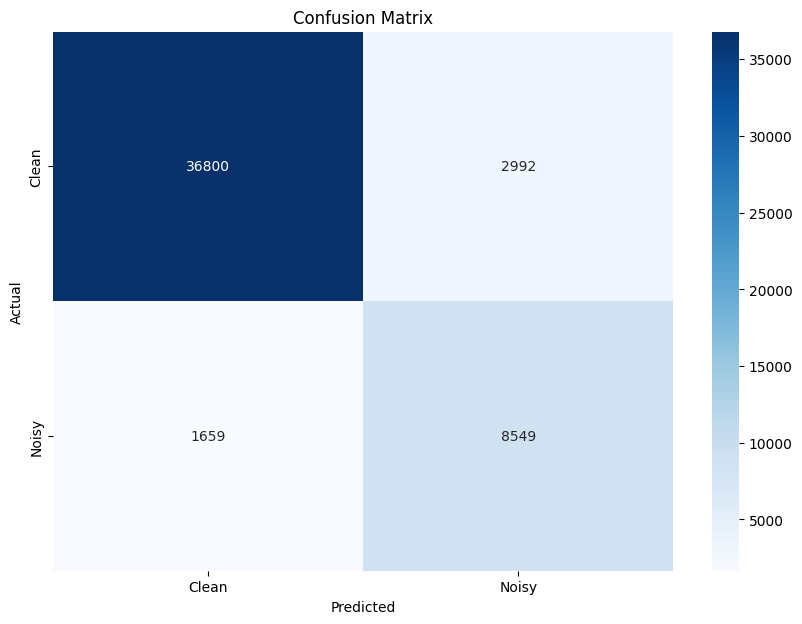

              precision    recall  f1-score   support

       Clean     0.8577    0.9343    0.8944     39792
       Noisy     0.6074    0.3960    0.4794     10208

    accuracy                         0.8244     50000
   macro avg     0.7326    0.6651    0.6869     50000
weighted avg     0.8066    0.8244    0.8097     50000



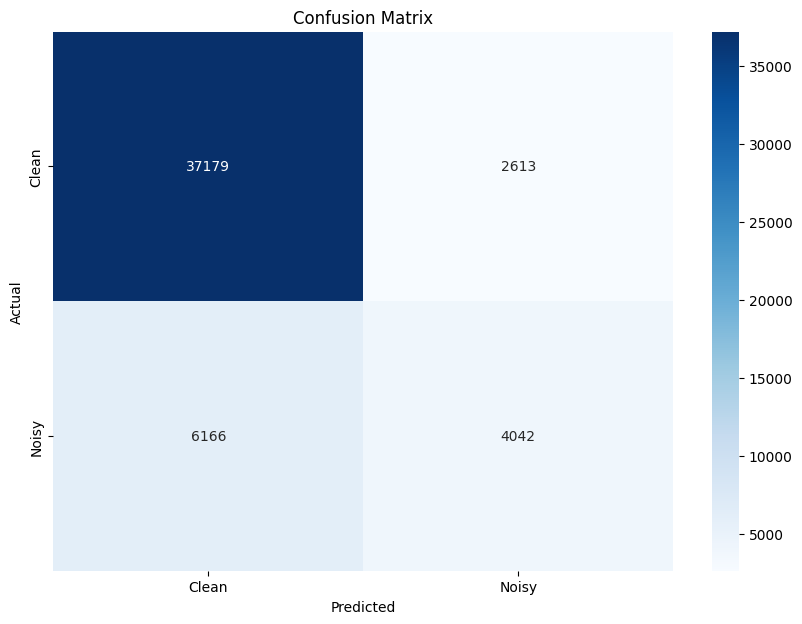

6655 removed from dataset and 4886 relabled
4.90% noise remained in 43345 data


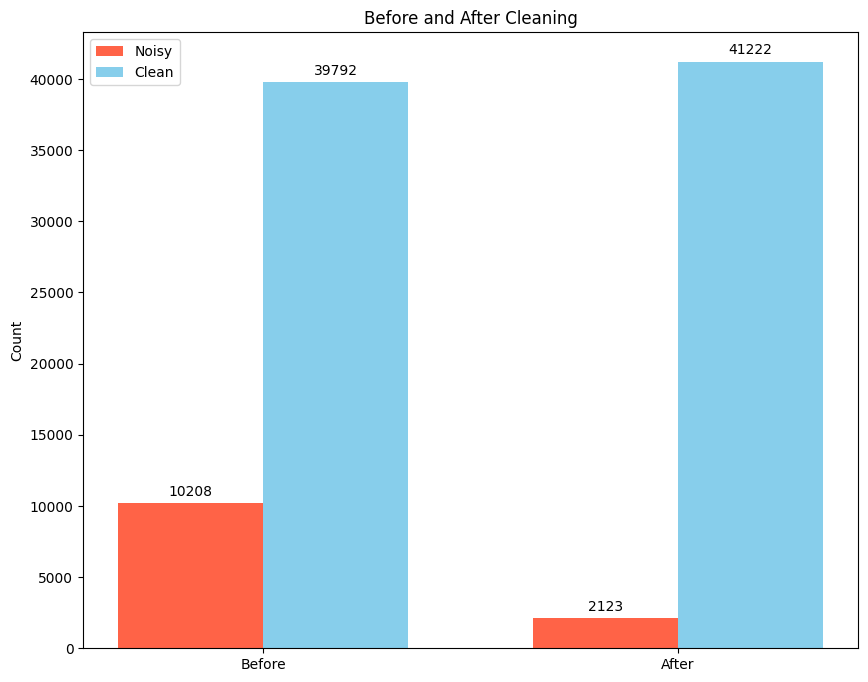

100%|██████████| 43345/43345 [05:45<00:00, 125.37it/s] 


Cleaned dataset saved to cleaned/Advanced-CIFAR10.pkl


In [4]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=9, relabel_threshold=10)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10')

In [6]:
noise_cleaner.save_cleaned_cifar_dataset('cleaned', 'CIFAR10')

100%|██████████| 41150/41150 [00:01<00:00, 21517.98it/s]

Cleaned dataset saved to cleaned/CIFAR10.pkl


## CIFAR10 - 30

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10(30)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.3, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=10, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10(30)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10(30)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 14976 out of 50000 data


In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
72.09847596717468% accuracy in 853 data
Loaded 853 noisy indices from cifar10(30)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
74.22434367541766% accuracy in 838 data
Loaded 838 noisy indices from cifar10(30)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
74.74048442906575% accuracy in 867 data
Loaded 867 noisy indices from cifar10(30)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
78.2668500687758% accuracy in 727 data
Loaded 727 noisy indices from cifar10(30)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
74.47306791569088% accuracy in 854 data
Loaded 854 noisy indices from cifar10(30)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
77.1604938271605% accuracy in 810 data
Loaded 810 noisy indices from cifar10(30)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
76.58371040723982% accuracy in 884 data
Loaded 884 noisy ind

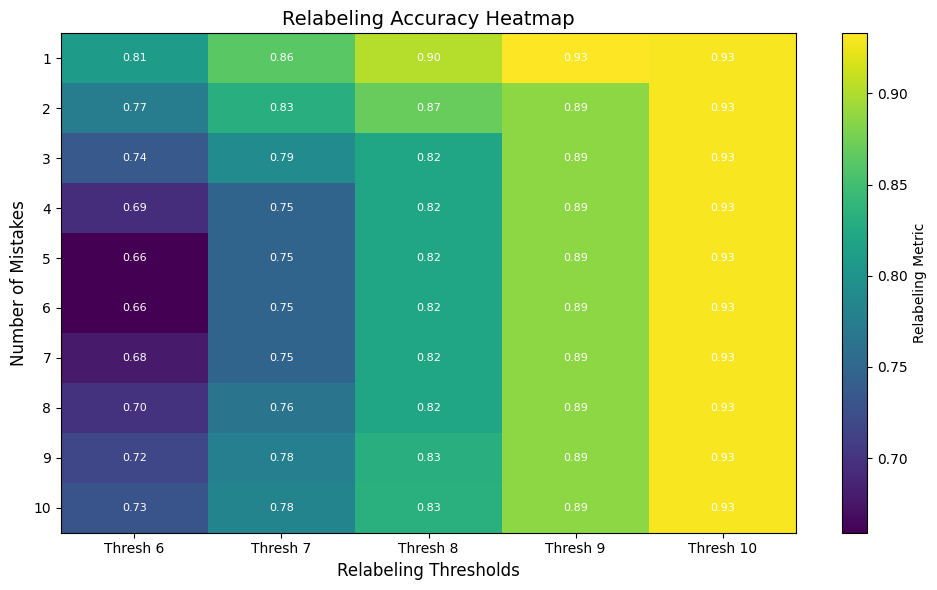

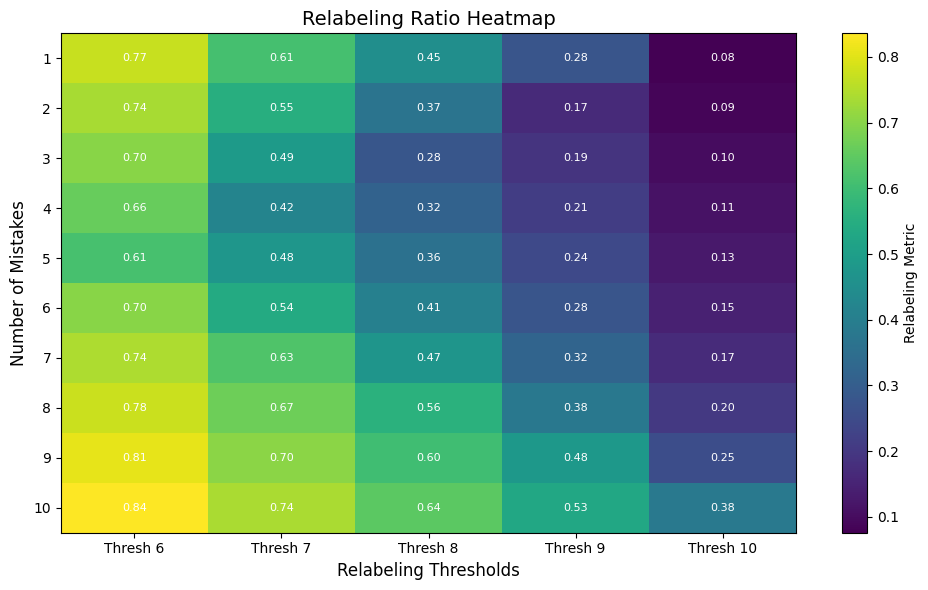

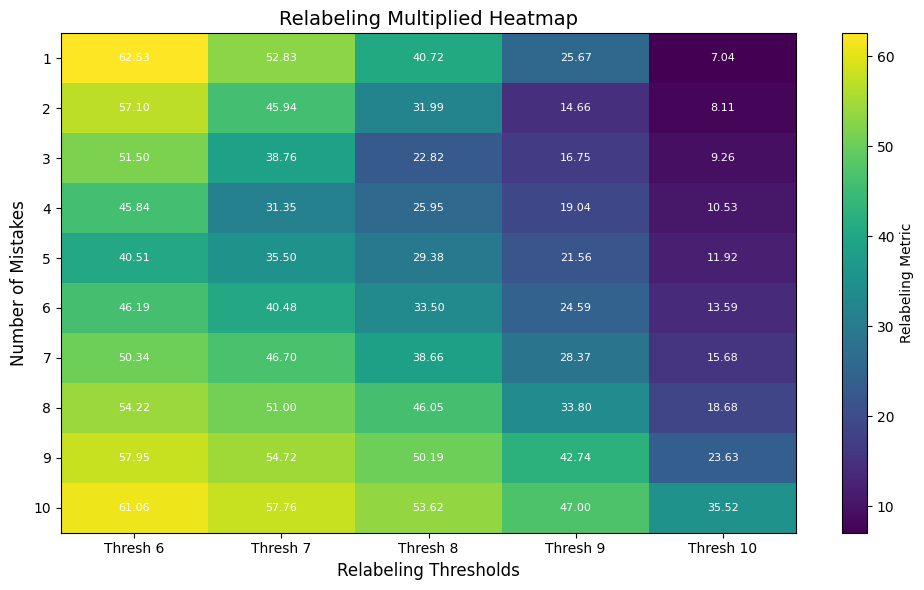

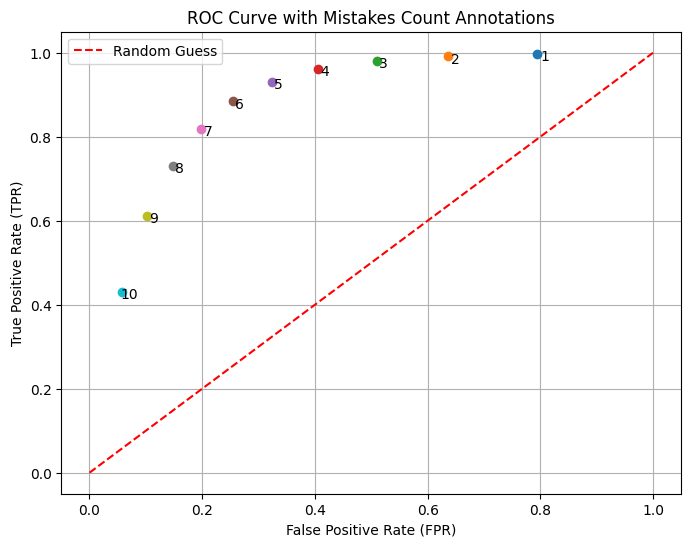

Area Under the Curve (AUC): 0.6646810900562569


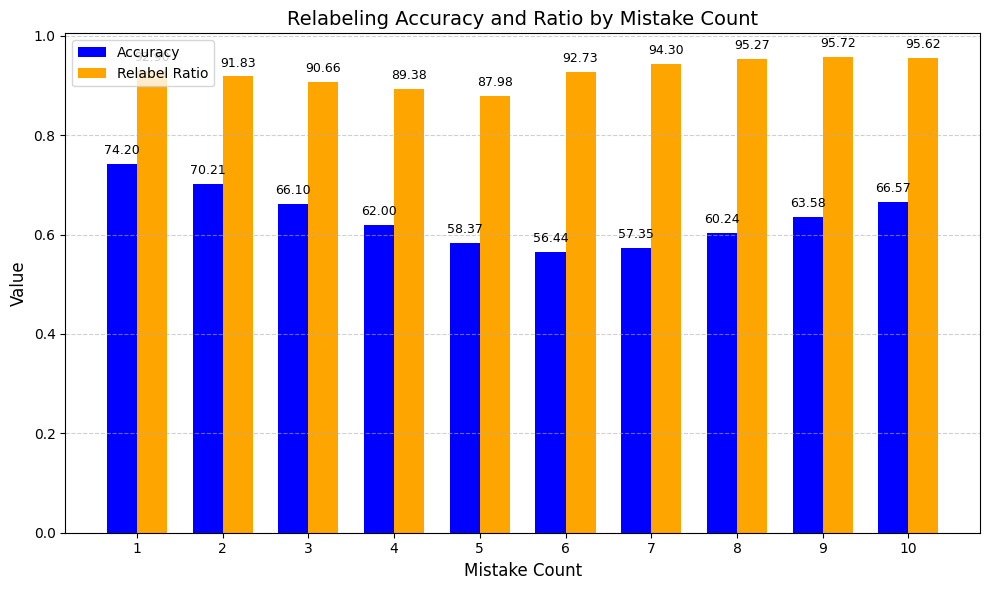

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.9119    0.8018    0.8533     35024
       Noisy     0.6386    0.8188    0.7176     14976

    accuracy                         0.8069     50000
   macro avg     0.7752    0.8103    0.7854     50000
weighted avg     0.8300    0.8069    0.8127     50000



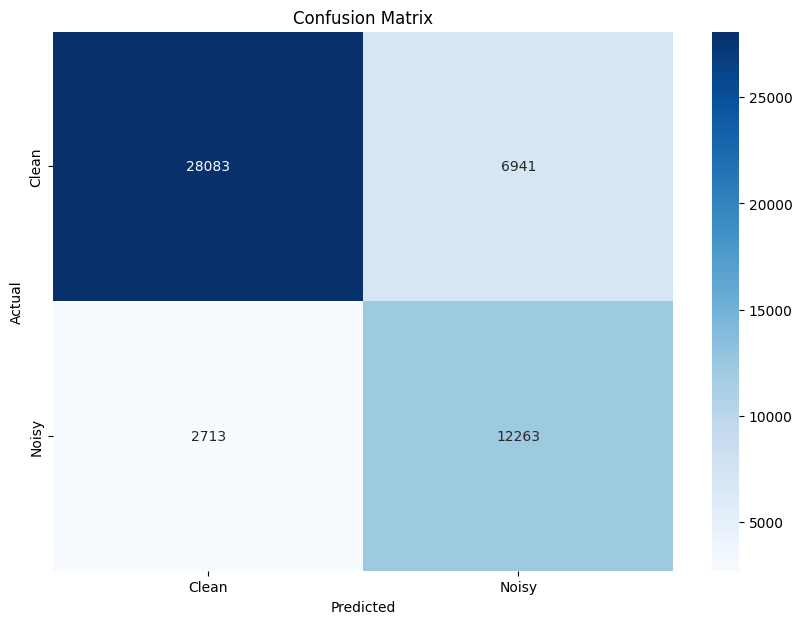

              precision    recall  f1-score   support

       Clean     0.7380    0.8395    0.7855     35024
       Noisy     0.4467    0.3030    0.3610     14976

    accuracy                         0.6788     50000
   macro avg     0.5923    0.5712    0.5733     50000
weighted avg     0.6507    0.6788    0.6584     50000



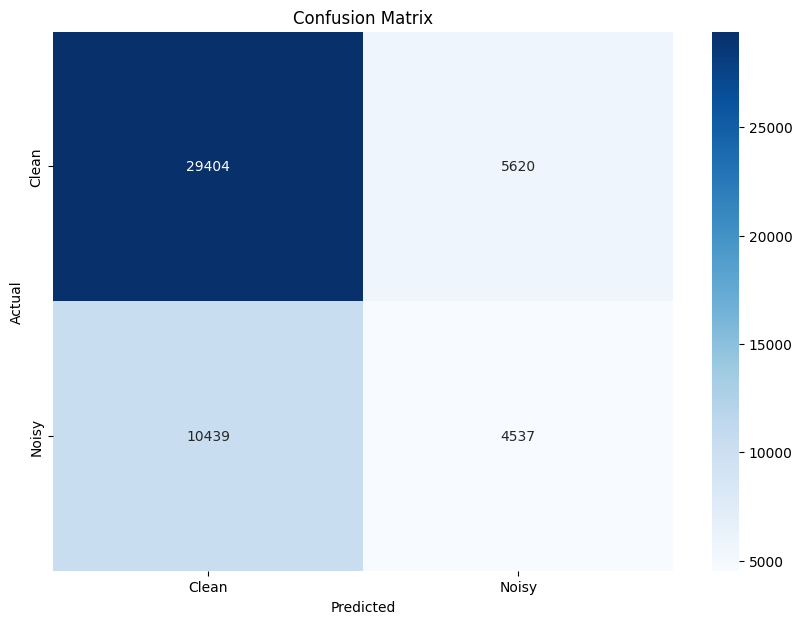

10157 removed from dataset and 9047 relabled
10.88% noise remained in 39843 data


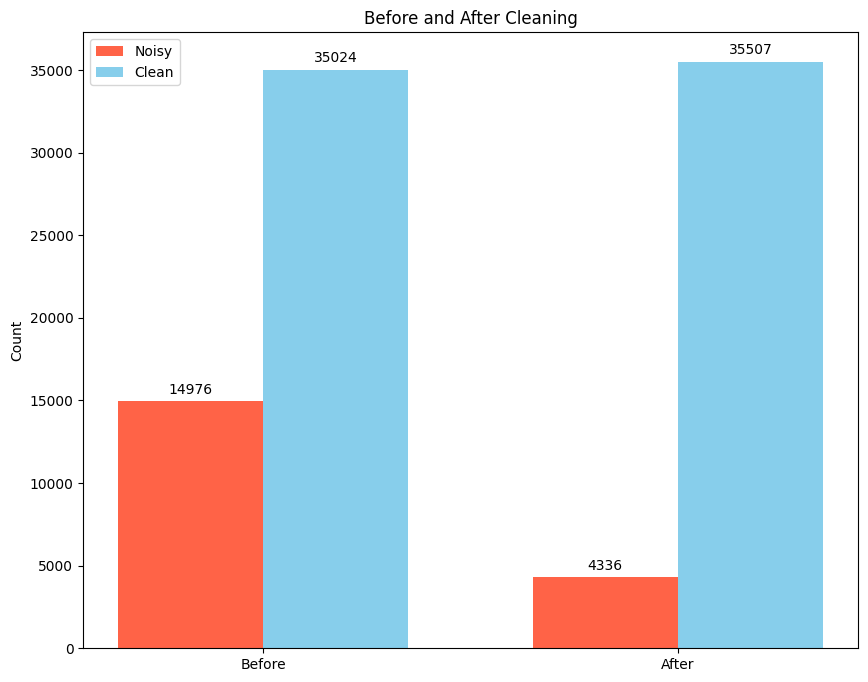

100%|██████████| 39843/39843 [00:01<00:00, 20965.34it/s]

Cleaned dataset saved to cleaned/Advanced-CIFAR10-30.pkl


In [17]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=7, relabel_threshold=8)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10-30')

# CIFAR10 - 40

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10(40)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.3, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=15, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=new_augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10(40)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10(40)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 14976 out of 50000 data


handling big fold 1/10
number_of_pairs: 3591
Training fold 1/10...


Epoch 29/1000:   3%|▎         | 30/1000 [51:42<27:52:03, 103.43s/it, val_loss=4.68, val_contrastive=1.3, val_accuracy=50.7, train_loss=3.42, train_contrastive=1.47, best_accuracy=52.5, best_loss=4.67] 


Early stopping triggered
Loading best model from checkpoint...


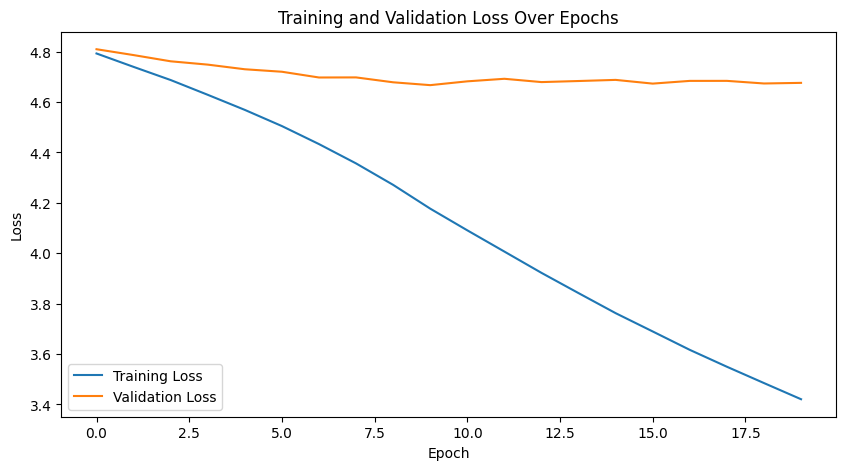

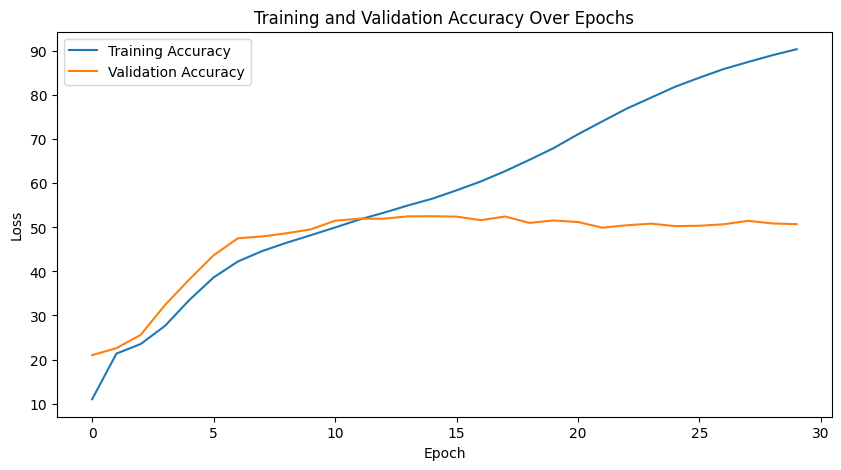

Extracting Embeddings: 100%|██████████| 51/51 [00:01<00:00, 28.69it/s]


Distance between embedding 5191 and 3191: 1.1716
Distance between embedding 5191 and 5128: 1.3198
Distance between embedding 5191 and 4045: 1.6364
Distance between embedding 5191 and 455: 1.4341
Distance between embedding 5191 and 2809: 1.1149
Distance between embedding 5191 and 3296: 1.6064
Distance between embedding 5191 and 1602: 1.4495
Distance between embedding 5191 and 612: 1.3328
Distance between embedding 5191 and 95: 1.4561
Distance between embedding 5191 and 5022: 1.6724
Distance between embedding 5191 and 5215: 1.3268
Distance between embedding 5191 and 4136: 1.5132
Distance between embedding 5191 and 1923: 0.9962
Distance between embedding 5191 and 3600: 1.3798
Distance between embedding 5191 and 4948: 1.3575
Distance between embedding 5191 and 2887: 1.5372
Distance between embedding 5191 and 2696: 1.2818
Distance between embedding 5191 and 2124: 1.5126
Distance between embedding 5191 and 3634: 1.2286
Distance between embedding 3191 and 5128: 1.2117
Distance between embeddi

Testing: 100%|██████████| 51/51 [00:01<00:00, 32.97it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 52.54%
Test Precision: 0.50
Test Recall: 0.53
Test F1 Score: 0.50
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 29/1000:   3%|▎         | 30/1000 [52:06<28:04:39, 104.21s/it, val_loss=4.74, val_contrastive=1.28, val_accuracy=49.6, train_loss=3.28, train_contrastive=1.46, best_accuracy=53.1, best_loss=4.67]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 23.19it/s]


Test Accuracy: 53.06%
Test Precision: 0.53
Test Recall: 0.53
Test F1 Score: 0.52
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 28/1000:   3%|▎         | 29/1000 [50:36<28:14:23, 104.70s/it, val_loss=4.72, val_contrastive=1.27, val_accuracy=49.5, train_loss=3.28, train_contrastive=1.46, best_accuracy=53, best_loss=4.68]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 21.05it/s]


Test Accuracy: 52.99%
Test Precision: 0.54
Test Recall: 0.53
Test F1 Score: 0.53
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 29/1000:   3%|▎         | 30/1000 [52:30<28:17:39, 105.01s/it, val_loss=4.69, val_contrastive=1.33, val_accuracy=51.1, train_loss=3.3, train_contrastive=1.49, best_accuracy=54.3, best_loss=4.62] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.61it/s]


Test Accuracy: 54.33%
Test Precision: 0.55
Test Recall: 0.54
Test F1 Score: 0.54
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 31/1000:   3%|▎         | 32/1000 [56:05<28:16:32, 105.16s/it, val_loss=4.77, val_contrastive=1.26, val_accuracy=49.4, train_loss=3.15, train_contrastive=1.47, best_accuracy=52.3, best_loss=4.69]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 22.49it/s]


Test Accuracy: 52.31%
Test Precision: 0.53
Test Recall: 0.52
Test F1 Score: 0.52
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 29/1000:   3%|▎         | 30/1000 [52:25<28:15:17, 104.86s/it, val_loss=4.71, val_contrastive=1.29, val_accuracy=49.1, train_loss=3.34, train_contrastive=1.47, best_accuracy=52.2, best_loss=4.71]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.30it/s]


Test Accuracy: 52.17%
Test Precision: 0.52
Test Recall: 0.52
Test F1 Score: 0.52
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 42/1000:   4%|▍         | 43/1000 [1:15:17<27:55:51, 105.07s/it, val_loss=4.85, val_contrastive=1.19, val_accuracy=48.3, train_loss=2.65, train_contrastive=1.29, best_accuracy=50.4, best_loss=4.71]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.19it/s]


Test Accuracy: 50.36%
Test Precision: 0.50
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 35/1000:   4%|▎         | 36/1000 [1:03:02<28:07:54, 105.06s/it, val_loss=4.77, val_contrastive=1.24, val_accuracy=49.8, train_loss=3.14, train_contrastive=1.4, best_accuracy=51.1, best_loss=4.71] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.37it/s]


Test Accuracy: 51.07%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 34/1000:   4%|▎         | 35/1000 [1:01:23<28:12:34, 105.24s/it, val_loss=4.78, val_contrastive=1.25, val_accuracy=48.7, train_loss=3.1, train_contrastive=1.42, best_accuracy=50.1, best_loss=4.7]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.25it/s]


Test Accuracy: 50.08%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 34/1000:   4%|▎         | 35/1000 [1:01:19<28:11:01, 105.14s/it, val_loss=4.75, val_contrastive=1.26, val_accuracy=49.4, train_loss=3.19, train_contrastive=1.43, best_accuracy=51.9, best_loss=4.71]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.15it/s]


Test Accuracy: 51.93%
Test Precision: 0.52
Test Recall: 0.52
Test F1 Score: 0.51
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10


Evaluating Noisy Samples: 100%|██████████| 10/10 [00:11<00:00,  1.18s/it]


65.37102473498233% relabeling accuracy


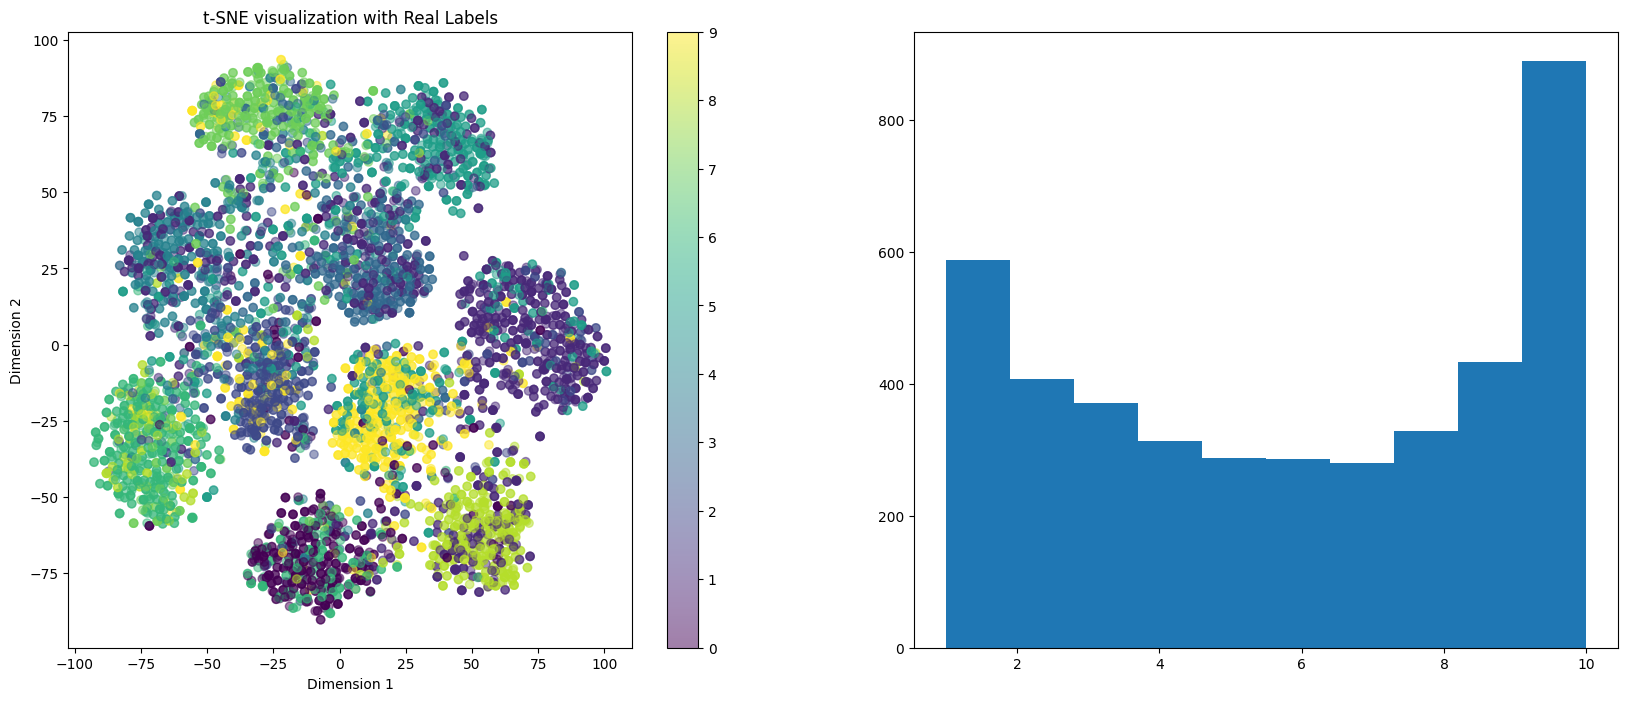

Predicted noise indices: [22, 35, 94, 150, 191, 251, 255, 388, 424, 459, 502, 636, 645, 648, 756, 804, 820, 857, 961, 1081, 1090, 1122, 1200, 1219, 1352, 1421, 1429, 1430, 1446, 1573, 1583, 1584, 1611, 1618, 1758, 1764, 1955, 1997, 2099, 2103, 2271, 2287, 2321, 2367, 2428, 2433, 2484, 2524, 2563, 2647, 2714, 2789, 2808, 2818, 2854, 2878, 2919, 2935, 3008, 3090, 3444, 3454, 3501, 3543, 3655, 3686, 3708, 3739, 3760, 3781, 3854, 3856, 3902, 3960, 3976, 3982, 3998, 4008, 4075, 4148, 4157, 4330, 4352, 4375, 4428, 4500, 4511, 4605, 4625, 4650, 4663, 4664, 4700, 4735, 4744, 4767, 4771, 4824, 4908, 4929, 4939, 4984, 5022, 5162, 5171, 5182, 5184, 5248, 5251, 5270, 5351, 5379, 5560, 5755, 5878, 5926, 5966, 6016, 6094, 6148, 6205, 6299, 6358, 6412, 6430, 6481, 6499, 6532, 6555, 6577, 6619, 6638, 6776, 6944, 7045, 7151, 7205, 7277, 7389, 7398, 7412, 7459, 7506, 7651, 7664, 7726, 7747, 7795, 7818, 7853, 7989, 8049, 8050, 8053, 8109, 8186, 8212, 8216, 8280, 8283, 8336, 8373, 8454, 8466, 8485, 8536, 

Epoch 33/1000:   3%|▎         | 34/1000 [59:29<28:10:22, 104.99s/it, val_loss=4.65, val_contrastive=1.26, val_accuracy=51, train_loss=3.11, train_contrastive=1.42, best_accuracy=52.5, best_loss=4.65]  


Early stopping triggered
Loading best model from checkpoint...


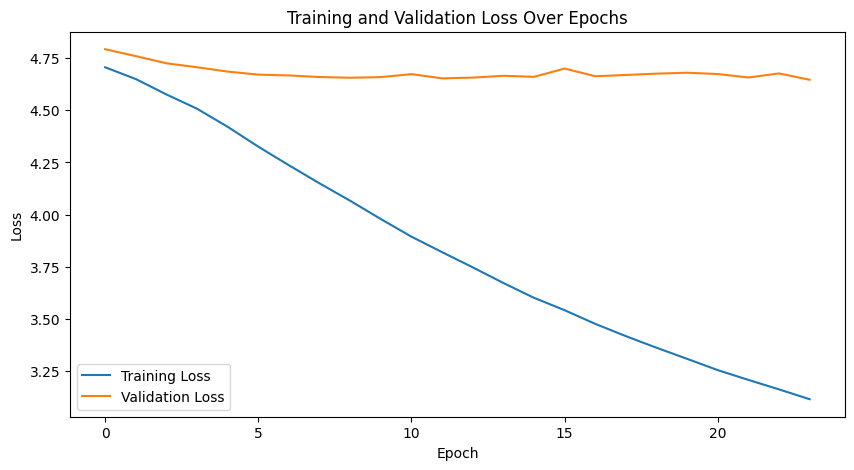

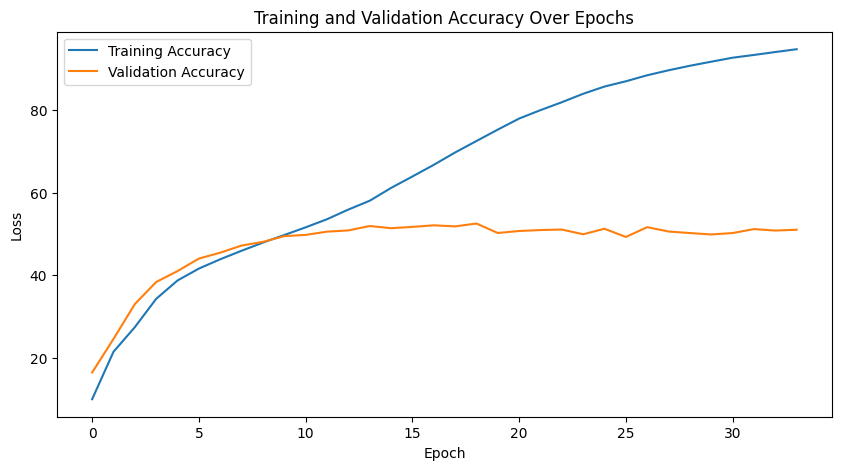

Extracting Embeddings: 100%|██████████| 51/51 [00:02<00:00, 18.04it/s]


Distance between embedding 876 and 1942: 1.3902
Distance between embedding 876 and 6404: 1.2611
Distance between embedding 876 and 6074: 0.6832
Distance between embedding 876 and 1762: 1.3015
Distance between embedding 876 and 4504: 1.3646
Distance between embedding 876 and 3157: 1.2126
Distance between embedding 876 and 1654: 1.9393
Distance between embedding 876 and 4838: 1.7741
Distance between embedding 876 and 3067: 1.2616
Distance between embedding 876 and 6371: 1.1357
Distance between embedding 876 and 6376: 1.4143
Distance between embedding 876 and 6098: 1.3833
Distance between embedding 876 and 713: 0.6418
Distance between embedding 876 and 1565: 1.2243
Distance between embedding 876 and 3359: 0.8210
Distance between embedding 876 and 4612: 0.8872
Distance between embedding 876 and 5093: 1.3489
Distance between embedding 876 and 3104: 1.1914
Distance between embedding 876 and 3489: 0.7868
Distance between embedding 1942 and 6404: 1.1090
Distance between embedding 1942 and 6074

Testing: 100%|██████████| 51/51 [00:02<00:00, 20.27it/s]


Test Accuracy: 52.54%
Test Precision: 0.53
Test Recall: 0.53
Test F1 Score: 0.52
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 78/1000:   8%|▊         | 79/1000 [2:17:59<26:48:49, 104.81s/it, val_loss=4.76, val_contrastive=1.15, val_accuracy=50.4, train_loss=2.22, train_contrastive=1.01, best_accuracy=50.9, best_loss=4.7] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.35it/s]


Test Accuracy: 50.91%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 28/1000:   3%|▎         | 29/1000 [50:59<28:27:04, 105.48s/it, val_loss=4.66, val_contrastive=1.29, val_accuracy=53.4, train_loss=3.36, train_contrastive=1.46, best_accuracy=55.9, best_loss=4.61]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.95it/s]


Test Accuracy: 55.93%
Test Precision: 0.57
Test Recall: 0.56
Test F1 Score: 0.55
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 45/1000:   5%|▍         | 46/1000 [1:20:55<27:58:19, 105.55s/it, val_loss=4.79, val_contrastive=1.26, val_accuracy=50.6, train_loss=2.89, train_contrastive=1.37, best_accuracy=51.7, best_loss=4.78]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.13it/s]


Test Accuracy: 51.66%
Test Precision: 0.52
Test Recall: 0.52
Test F1 Score: 0.52
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 45/1000:   5%|▍         | 46/1000 [1:20:46<27:55:12, 105.36s/it, val_loss=4.89, val_contrastive=1.23, val_accuracy=49.6, train_loss=2.77, train_contrastive=1.33, best_accuracy=51.3, best_loss=4.78]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.63it/s]


Test Accuracy: 51.30%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 24/1000:   2%|▎         | 25/1000 [43:54<28:32:33, 105.39s/it, val_loss=4.7, val_contrastive=1.28, val_accuracy=49.3, train_loss=3.36, train_contrastive=1.45, best_accuracy=52.8, best_loss=4.61] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.73it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 52.77%
Test Precision: 0.50
Test Recall: 0.53
Test F1 Score: 0.51
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 28/1000:   3%|▎         | 29/1000 [50:51<28:22:40, 105.21s/it, val_loss=4.68, val_contrastive=1.31, val_accuracy=50, train_loss=3.39, train_contrastive=1.47, best_accuracy=53.2, best_loss=4.59]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.04it/s]


Test Accuracy: 53.23%
Test Precision: 0.54
Test Recall: 0.53
Test F1 Score: 0.53
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 27/1000:   3%|▎         | 28/1000 [49:12<28:28:25, 105.46s/it, val_loss=4.72, val_contrastive=1.3, val_accuracy=48.8, train_loss=3.46, train_contrastive=1.46, best_accuracy=53.7, best_loss=4.64] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.48it/s]


Test Accuracy: 53.71%
Test Precision: 0.55
Test Recall: 0.54
Test F1 Score: 0.53
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 33/1000:   3%|▎         | 34/1000 [59:41<28:15:51, 105.33s/it, val_loss=4.68, val_contrastive=1.28, val_accuracy=51.8, train_loss=3.05, train_contrastive=1.42, best_accuracy=54.2, best_loss=4.65]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.96it/s]


Test Accuracy: 54.24%
Test Precision: 0.54
Test Recall: 0.54
Test F1 Score: 0.54
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 40/1000:   4%|▍         | 41/1000 [1:11:59<28:04:04, 105.36s/it, val_loss=4.75, val_contrastive=1.25, val_accuracy=51, train_loss=2.98, train_contrastive=1.4, best_accuracy=51.5, best_loss=4.74]   


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.42it/s]


Test Accuracy: 51.49%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10


Evaluating Noisy Samples: 100%|██████████| 10/10 [00:11<00:00,  1.19s/it]


67.44730679156909% relabeling accuracy


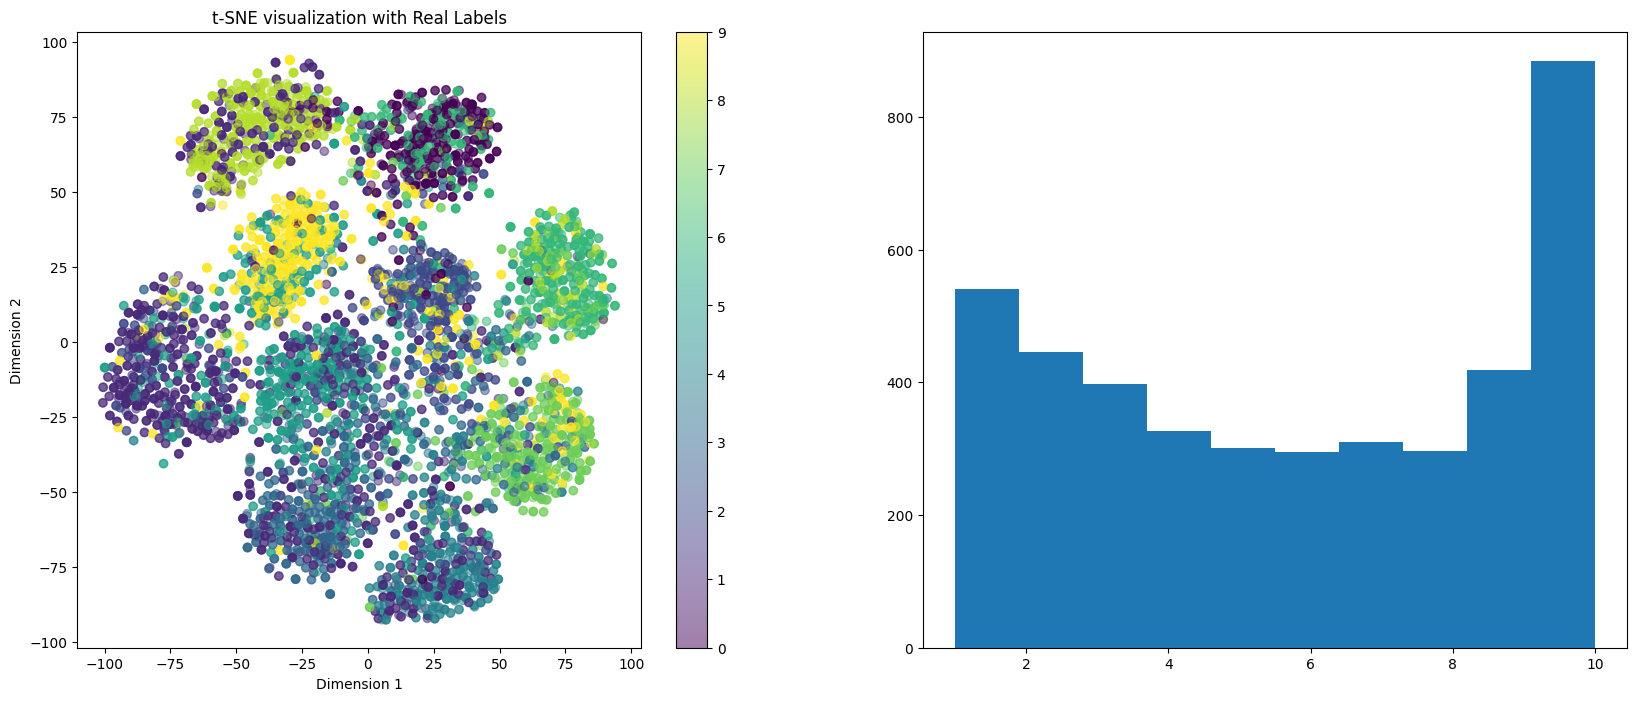

Predicted noise indices: [189, 224, 312, 318, 338, 361, 492, 511, 548, 555, 655, 781, 785, 819, 822, 914, 923, 1069, 1089, 1095, 1109, 1136, 1175, 1197, 1202, 1240, 1289, 1321, 1436, 1451, 1592, 1677, 1766, 1949, 1958, 2022, 2039, 2049, 2190, 2394, 2536, 2580, 2583, 2655, 2659, 2661, 2681, 2698, 2742, 2762, 2771, 2833, 2898, 2938, 2954, 2960, 2966, 2986, 2989, 3014, 3023, 3054, 3235, 3301, 3313, 3323, 3344, 3396, 3404, 3520, 3609, 3685, 3696, 4077, 4112, 4117, 4159, 4167, 4192, 4406, 4416, 4431, 4434, 4437, 4549, 4607, 4840, 4872, 4971, 5096, 5105, 5117, 5159, 5218, 5224, 5294, 5304, 5355, 5377, 5381, 5456, 5474, 5515, 5524, 5585, 5641, 5725, 5746, 5849, 5915, 6012, 6035, 6077, 6133, 6234, 6239, 6265, 6290, 6319, 6421, 6552, 6666, 6676, 6705, 6857, 6869, 6915, 6967, 7005, 7062, 7084, 7266, 7310, 7326, 7375, 7383, 7407, 7411, 7421, 7482, 7534, 7709, 7833, 7868, 7951, 8026, 8096, 8101, 8106, 8176, 8262, 8270, 8333, 8619, 8708, 8731, 8761, 8762, 8776, 8848, 8849, 8993, 9002, 9159, 9161, 9

Epoch 31/1000:   3%|▎         | 32/1000 [55:49<28:08:36, 104.67s/it, val_loss=4.77, val_contrastive=1.27, val_accuracy=50, train_loss=3.23, train_contrastive=1.44, best_accuracy=51.7, best_loss=4.71]  


Early stopping triggered
Loading best model from checkpoint...


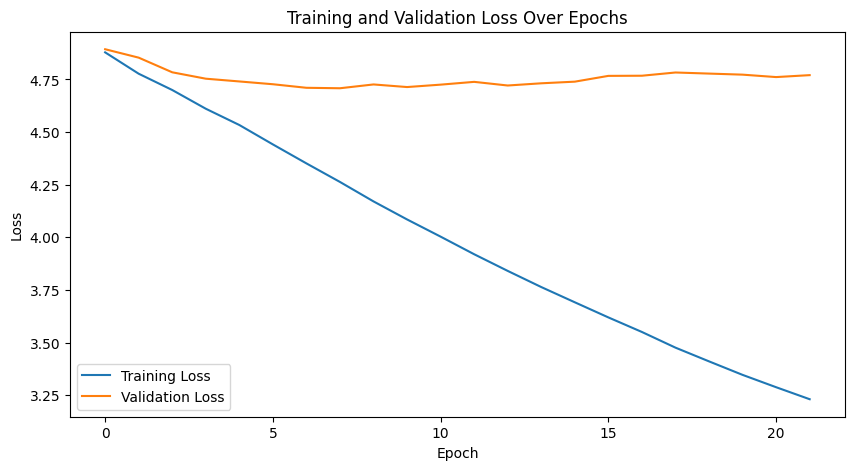

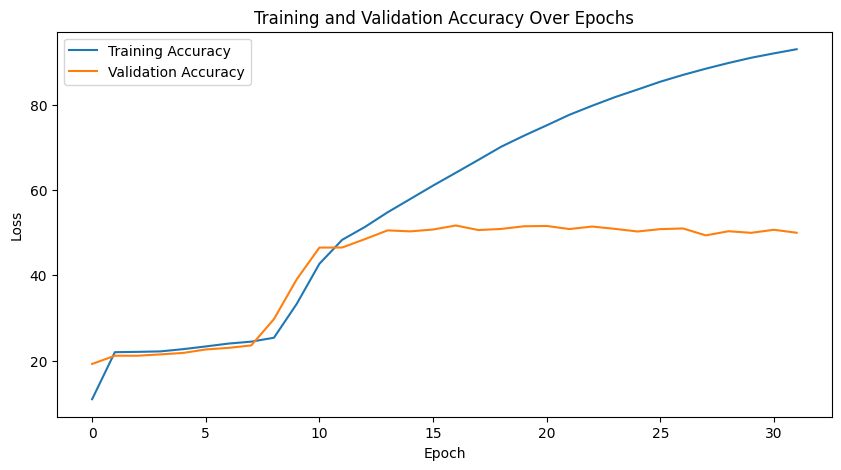

Extracting Embeddings: 100%|██████████| 51/51 [00:02<00:00, 18.40it/s]


Distance between embedding 2534 and 3474: 1.6156
Distance between embedding 2534 and 2778: 0.7746
Distance between embedding 2534 and 3554: 1.2744
Distance between embedding 2534 and 5255: 1.3286
Distance between embedding 2534 and 543: 1.2537
Distance between embedding 2534 and 3877: 1.6131
Distance between embedding 2534 and 3903: 1.5952
Distance between embedding 2534 and 105: 1.4752
Distance between embedding 2534 and 5361: 1.1552
Distance between embedding 2534 and 2254: 1.3237
Distance between embedding 2534 and 1886: 1.3742
Distance between embedding 2534 and 440: 1.7065
Distance between embedding 2534 and 2319: 1.4196
Distance between embedding 2534 and 1475: 1.3439
Distance between embedding 2534 and 2625: 1.2078
Distance between embedding 2534 and 3090: 1.1874
Distance between embedding 2534 and 2389: 0.8807
Distance between embedding 2534 and 5745: 1.2967
Distance between embedding 2534 and 5754: 1.4141
Distance between embedding 3474 and 2778: 1.5853
Distance between embedd

Testing: 100%|██████████| 51/51 [00:02<00:00, 20.35it/s]


Test Accuracy: 51.70%
Test Precision: 0.52
Test Recall: 0.52
Test F1 Score: 0.51
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 29/1000:   3%|▎         | 30/1000 [52:24<28:14:25, 104.81s/it, val_loss=4.61, val_contrastive=1.27, val_accuracy=50, train_loss=3.1, train_contrastive=1.43, best_accuracy=54.9, best_loss=4.48]   


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.11it/s]


Test Accuracy: 54.90%
Test Precision: 0.55
Test Recall: 0.55
Test F1 Score: 0.54
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 32/1000:   3%|▎         | 33/1000 [57:55<28:17:15, 105.31s/it, val_loss=4.86, val_contrastive=1.28, val_accuracy=49.4, train_loss=3.18, train_contrastive=1.46, best_accuracy=51.6, best_loss=4.75]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.88it/s]


Test Accuracy: 51.59%
Test Precision: 0.52
Test Recall: 0.52
Test F1 Score: 0.50
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 54/1000:   6%|▌         | 55/1000 [1:36:45<27:42:26, 105.55s/it, val_loss=4.8, val_contrastive=1.2, val_accuracy=48.7, train_loss=2.66, train_contrastive=1.28, best_accuracy=50.2, best_loss=4.78]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.59it/s]


Test Accuracy: 50.25%
Test Precision: 0.50
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 81/1000:   8%|▊         | 82/1000 [2:24:10<26:53:58, 105.49s/it, val_loss=4.92, val_contrastive=1.15, val_accuracy=50.9, train_loss=2.22, train_contrastive=1.02, best_accuracy=52, best_loss=4.81]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.06it/s]


Test Accuracy: 51.98%
Test Precision: 0.52
Test Recall: 0.52
Test F1 Score: 0.52
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 69/1000:   7%|▋         | 70/1000 [2:02:57<27:13:33, 105.39s/it, val_loss=4.9, val_contrastive=1.16, val_accuracy=48.6, train_loss=2.39, train_contrastive=1.11, best_accuracy=50.5, best_loss=4.79] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.88it/s]


Test Accuracy: 50.53%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 33/1000:   3%|▎         | 34/1000 [59:37<28:13:59, 105.22s/it, val_loss=4.83, val_contrastive=1.25, val_accuracy=49.3, train_loss=2.98, train_contrastive=1.42, best_accuracy=51.1, best_loss=4.75]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.72it/s]


Test Accuracy: 51.07%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 28/1000:   3%|▎         | 29/1000 [50:55<28:24:53, 105.35s/it, val_loss=4.55, val_contrastive=1.29, val_accuracy=52, train_loss=3.2, train_contrastive=1.45, best_accuracy=54, best_loss=4.54]     


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.77it/s]


Test Accuracy: 54.04%
Test Precision: 0.54
Test Recall: 0.54
Test F1 Score: 0.54
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 29/1000:   3%|▎         | 30/1000 [52:49<28:28:03, 105.65s/it, val_loss=4.69, val_contrastive=1.27, val_accuracy=50, train_loss=3.15, train_contrastive=1.43, best_accuracy=53.3, best_loss=4.6]   


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.79it/s]


Test Accuracy: 53.31%
Test Precision: 0.54
Test Recall: 0.53
Test F1 Score: 0.52
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 60/1000:   6%|▌         | 61/1000 [1:47:14<27:30:48, 105.48s/it, val_loss=4.74, val_contrastive=1.17, val_accuracy=50.1, train_loss=2.39, train_contrastive=1.15, best_accuracy=50.6, best_loss=4.66]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.39it/s]


Test Accuracy: 50.59%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10


Evaluating Noisy Samples: 100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


68.73479318734793% relabeling accuracy


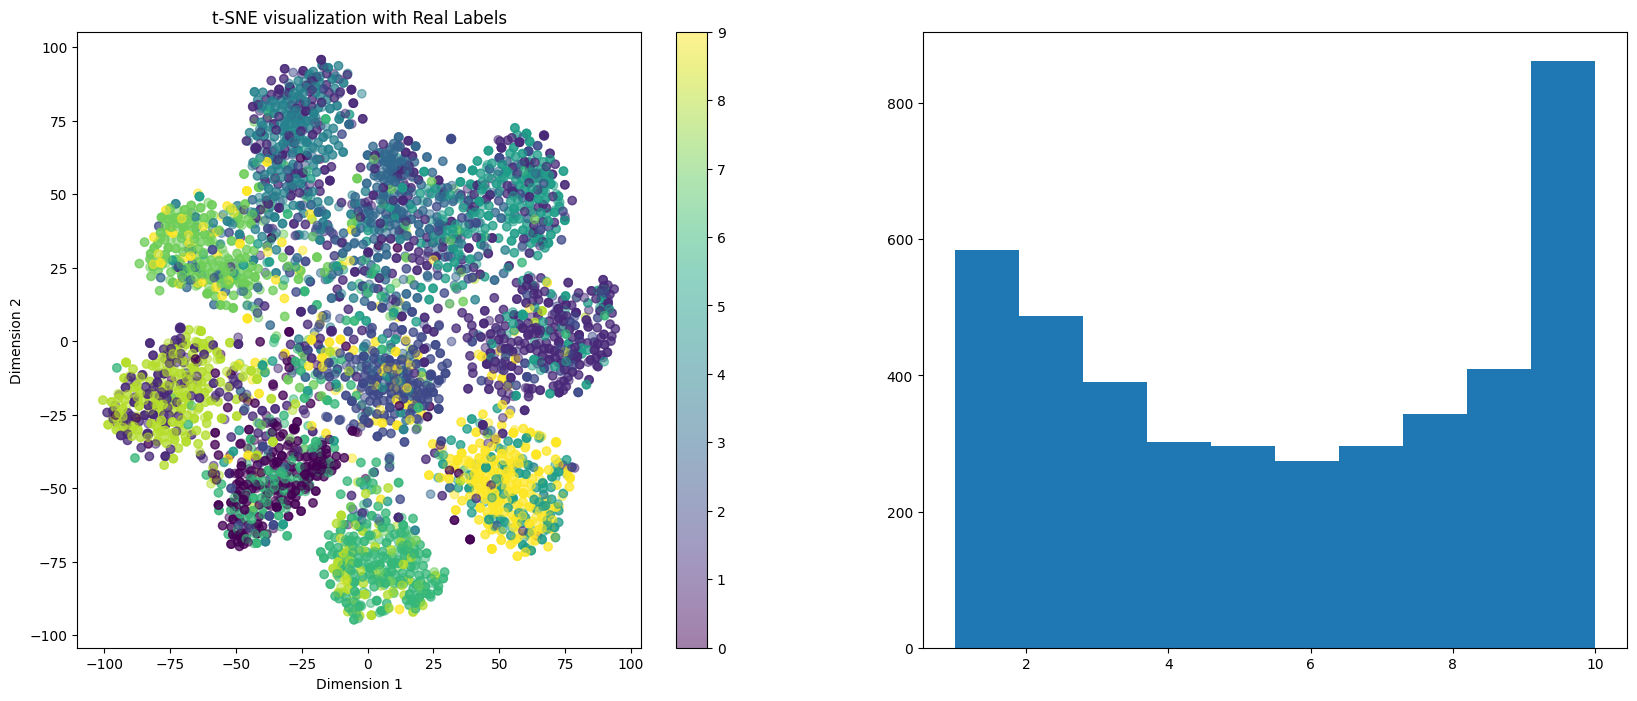

Predicted noise indices: [79, 124, 381, 405, 463, 551, 585, 604, 609, 682, 725, 729, 827, 842, 843, 865, 885, 922, 980, 1010, 1264, 1310, 1318, 1328, 1362, 1403, 1500, 1543, 1549, 1569, 1688, 1905, 1922, 1937, 1971, 1972, 1995, 2026, 2052, 2053, 2097, 2121, 2366, 2424, 2685, 2822, 2894, 2923, 2956, 2972, 3018, 3028, 3066, 3117, 3122, 3175, 3179, 3217, 3289, 3345, 3398, 3416, 3480, 3567, 3786, 3787, 3852, 3990, 4116, 4132, 4139, 4184, 4214, 4260, 4275, 4279, 4301, 4310, 4317, 4399, 4478, 4488, 4633, 4656, 4660, 4671, 4690, 4698, 4745, 4785, 4818, 4919, 4940, 5146, 5147, 5157, 5233, 5339, 5367, 5384, 5470, 5531, 5532, 5731, 5754, 5775, 5821, 5879, 5894, 6011, 6076, 6146, 6257, 6260, 6324, 6585, 6592, 6605, 6646, 6731, 6743, 6748, 6849, 6922, 6986, 7094, 7117, 7177, 7212, 7220, 7284, 7430, 7448, 7611, 7671, 7732, 7867, 7874, 7897, 7948, 7982, 8055, 8082, 8083, 8128, 8137, 8144, 8285, 8304, 8321, 8495, 8646, 8693, 8921, 8935, 8990, 9001, 9017, 9064, 9097, 9118, 9126, 9141, 9231, 9237, 9255

Epoch 36/1000:   4%|▎         | 37/1000 [1:04:40<28:03:09, 104.87s/it, val_loss=4.72, val_contrastive=1.29, val_accuracy=48.8, train_loss=3.23, train_contrastive=1.43, best_accuracy=49, best_loss=4.7] 


Early stopping triggered
Loading best model from checkpoint...


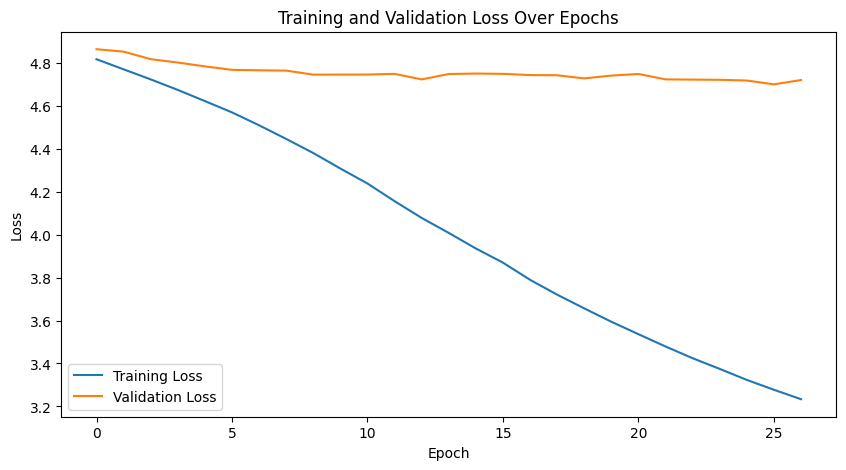

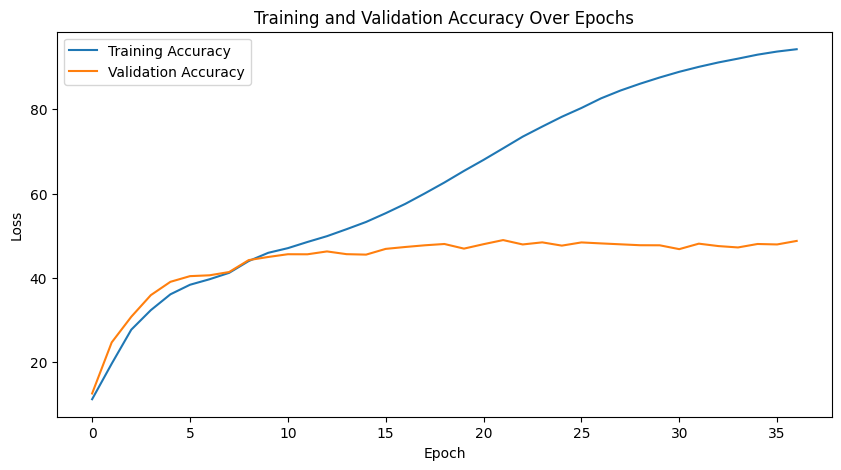

Extracting Embeddings: 100%|██████████| 51/51 [00:02<00:00, 18.62it/s]


Distance between embedding 3746 and 3281: 1.5826
Distance between embedding 3746 and 5607: 1.8969
Distance between embedding 3746 and 3988: 1.4217
Distance between embedding 3746 and 1345: 1.4576
Distance between embedding 3746 and 4498: 1.5102
Distance between embedding 3746 and 3392: 1.5239
Distance between embedding 3746 and 2926: 1.4229
Distance between embedding 3746 and 806: 1.3884
Distance between embedding 3746 and 4736: 0.9380
Distance between embedding 3746 and 2040: 1.5256
Distance between embedding 3746 and 5244: 1.2797
Distance between embedding 3746 and 5984: 0.7454
Distance between embedding 3746 and 3147: 1.0679
Distance between embedding 3746 and 3498: 0.9871
Distance between embedding 3746 and 1257: 0.9287
Distance between embedding 3746 and 5673: 1.3263
Distance between embedding 3746 and 5799: 1.1353
Distance between embedding 3746 and 2820: 1.1492
Distance between embedding 3746 and 6435: 1.5525
Distance between embedding 3281 and 5607: 1.7369
Distance between embe

Testing: 100%|██████████| 51/51 [00:02<00:00, 20.32it/s]


Test Accuracy: 48.96%
Test Precision: 0.50
Test Recall: 0.49
Test F1 Score: 0.48
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 42/1000:   4%|▍         | 43/1000 [1:15:19<27:56:21, 105.10s/it, val_loss=4.8, val_contrastive=1.21, val_accuracy=49.7, train_loss=2.63, train_contrastive=1.28, best_accuracy=51.2, best_loss=4.75] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.54it/s]


Test Accuracy: 51.22%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 25/1000:   3%|▎         | 26/1000 [45:44<28:33:22, 105.55s/it, val_loss=4.72, val_contrastive=1.28, val_accuracy=49.4, train_loss=3.47, train_contrastive=1.47, best_accuracy=54, best_loss=4.59]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.91it/s]


Test Accuracy: 54.02%
Test Precision: 0.55
Test Recall: 0.54
Test F1 Score: 0.53
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 31/1000:   3%|▎         | 32/1000 [56:24<28:26:33, 105.78s/it, val_loss=4.79, val_contrastive=1.3, val_accuracy=49, train_loss=3.58, train_contrastive=1.46, best_accuracy=50.4, best_loss=4.77]   


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.20it/s]


Test Accuracy: 50.40%
Test Precision: 0.52
Test Recall: 0.50
Test F1 Score: 0.49
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 40/1000:   4%|▍         | 41/1000 [1:12:02<28:05:11, 105.43s/it, val_loss=4.85, val_contrastive=1.26, val_accuracy=48.6, train_loss=3.15, train_contrastive=1.41, best_accuracy=51.4, best_loss=4.85]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.48it/s]


Test Accuracy: 51.42%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 36/1000:   4%|▎         | 37/1000 [1:05:07<28:14:50, 105.60s/it, val_loss=4.7, val_contrastive=1.26, val_accuracy=50.6, train_loss=3, train_contrastive=1.41, best_accuracy=52.7, best_loss=4.69]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.46it/s]


Test Accuracy: 52.69%
Test Precision: 0.53
Test Recall: 0.53
Test F1 Score: 0.53
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 30/1000:   3%|▎         | 31/1000 [54:31<28:24:12, 105.52s/it, val_loss=4.67, val_contrastive=1.29, val_accuracy=50.7, train_loss=3.3, train_contrastive=1.45, best_accuracy=51.7, best_loss=4.65] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.27it/s]


Test Accuracy: 51.70%
Test Precision: 0.53
Test Recall: 0.52
Test F1 Score: 0.50
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 34/1000:   4%|▎         | 35/1000 [1:01:28<28:15:06, 105.40s/it, val_loss=4.86, val_contrastive=1.3, val_accuracy=48.9, train_loss=3.27, train_contrastive=1.42, best_accuracy=50.5, best_loss=4.82]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.34it/s]


Test Accuracy: 50.51%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.48
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 31/1000:   3%|▎         | 32/1000 [56:23<28:25:54, 105.74s/it, val_loss=4.71, val_contrastive=1.29, val_accuracy=49.8, train_loss=3.26, train_contrastive=1.47, best_accuracy=53.5, best_loss=4.65]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.45it/s]


Test Accuracy: 53.50%
Test Precision: 0.53
Test Recall: 0.53
Test F1 Score: 0.53
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 56/1000:   6%|▌         | 57/1000 [1:40:26<27:41:49, 105.74s/it, val_loss=5.04, val_contrastive=1.19, val_accuracy=48, train_loss=2.6, train_contrastive=1.22, best_accuracy=48.4, best_loss=4.95]   


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.41it/s]


Test Accuracy: 48.41%
Test Precision: 0.48
Test Recall: 0.48
Test F1 Score: 0.48
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10


Evaluating Noisy Samples: 100%|██████████| 10/10 [00:12<00:00,  1.20s/it]


67.88124156545209% relabeling accuracy


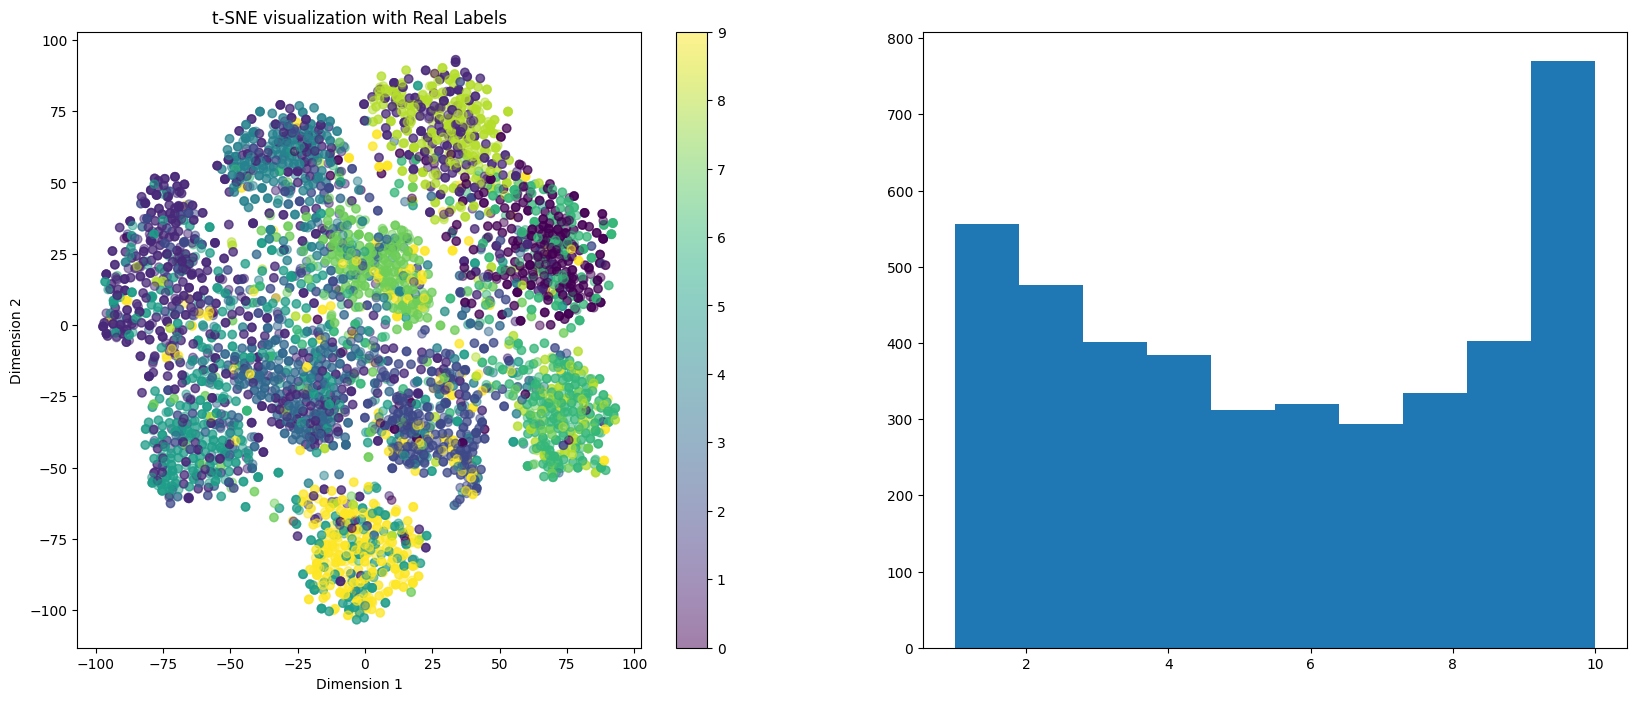

Predicted noise indices: [54, 103, 160, 185, 209, 288, 305, 382, 451, 517, 522, 587, 600, 813, 866, 975, 990, 1218, 1226, 1237, 1242, 1327, 1374, 1393, 1432, 1468, 1532, 1552, 1613, 1772, 1927, 1932, 1956, 1973, 2010, 2037, 2080, 2098, 2125, 2203, 2205, 2219, 2233, 2295, 2387, 2416, 2436, 2566, 2645, 2752, 2756, 2765, 2874, 2946, 2955, 3296, 3363, 3378, 3618, 3656, 3661, 3726, 3896, 3943, 4006, 4126, 4228, 4299, 4377, 4482, 4522, 4640, 4778, 4791, 4861, 4870, 4880, 4907, 4911, 4987, 5074, 5124, 5173, 5247, 5346, 5586, 5622, 5666, 5705, 5715, 5722, 5727, 5862, 6107, 6398, 6450, 6502, 6558, 6621, 6626, 6648, 6672, 6710, 6715, 6876, 6940, 6941, 6976, 7068, 7178, 7195, 7223, 7267, 7308, 7450, 7491, 7545, 7588, 7643, 7713, 7738, 7756, 7820, 7986, 8019, 8103, 8115, 8127, 8306, 8504, 8528, 8656, 8664, 8697, 8704, 8736, 8757, 8789, 8816, 8869, 8888, 8944, 8947, 8961, 8996, 9020, 9151, 9359, 9450, 9513, 9524, 9610, 9680, 9886, 9892, 9948, 9950, 10003, 10077, 10133, 10158, 10198, 10257, 10377, 1

Epoch 57/1000:   6%|▌         | 58/1000 [1:41:28<27:28:01, 104.97s/it, val_loss=4.73, val_contrastive=1.19, val_accuracy=50.7, train_loss=2.52, train_contrastive=1.19, best_accuracy=51.8, best_loss=4.68]


Early stopping triggered
Loading best model from checkpoint...


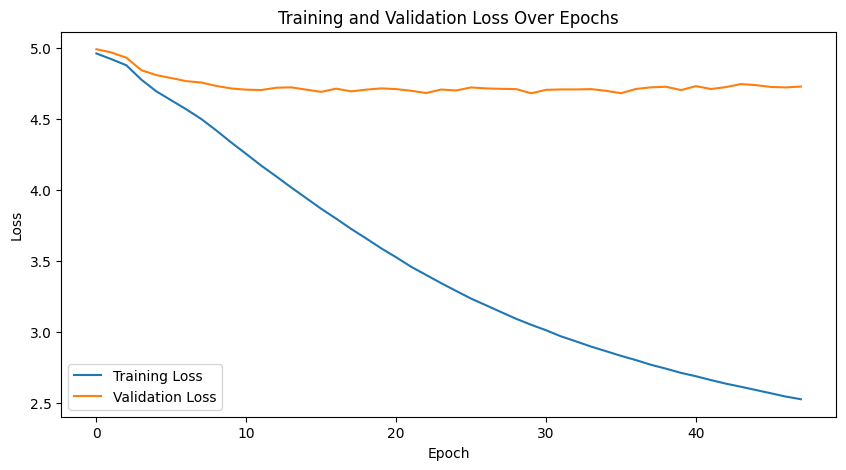

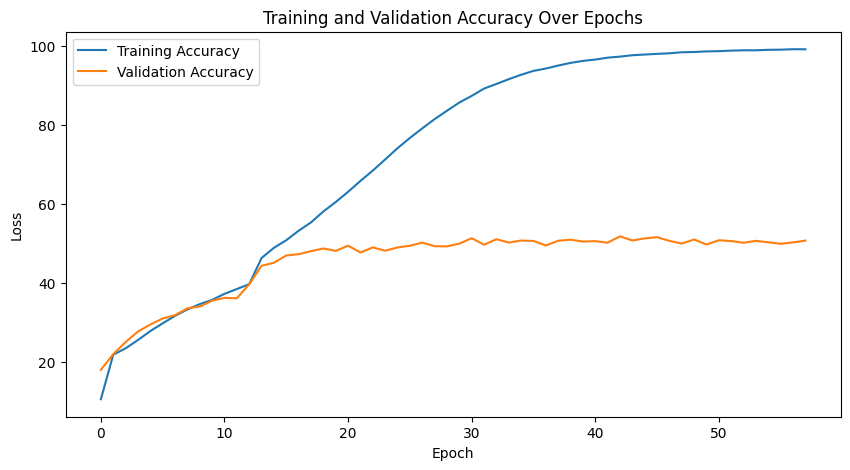

Extracting Embeddings: 100%|██████████| 51/51 [00:02<00:00, 17.05it/s]


Distance between embedding 4880 and 2769: 1.1456
Distance between embedding 4880 and 3501: 1.2893
Distance between embedding 4880 and 1331: 1.0706
Distance between embedding 4880 and 2263: 1.1974
Distance between embedding 4880 and 1684: 1.3205
Distance between embedding 4880 and 4828: 1.2590
Distance between embedding 4880 and 6115: 1.2397
Distance between embedding 4880 and 5338: 1.4679
Distance between embedding 4880 and 5833: 1.2686
Distance between embedding 4880 and 480: 1.0016
Distance between embedding 4880 and 4260: 1.2436
Distance between embedding 4880 and 3876: 1.0999
Distance between embedding 4880 and 3741: 1.0647
Distance between embedding 4880 and 2656: 1.2519
Distance between embedding 4880 and 4274: 1.3625
Distance between embedding 4880 and 1726: 1.2273
Distance between embedding 4880 and 6057: 1.1312
Distance between embedding 4880 and 5545: 1.3009
Distance between embedding 4880 and 3931: 1.8527
Distance between embedding 2769 and 3501: 1.5675
Distance between embe

Testing: 100%|██████████| 51/51 [00:02<00:00, 19.67it/s]


Test Accuracy: 51.81%
Test Precision: 0.52
Test Recall: 0.52
Test F1 Score: 0.52
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 31/1000:   3%|▎         | 32/1000 [56:00<28:14:20, 105.02s/it, val_loss=4.76, val_contrastive=1.28, val_accuracy=52.1, train_loss=3.36, train_contrastive=1.48, best_accuracy=53.2, best_loss=4.72]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.51it/s]


Test Accuracy: 53.17%
Test Precision: 0.54
Test Recall: 0.53
Test F1 Score: 0.53
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 32/1000:   3%|▎         | 33/1000 [58:01<28:20:30, 105.51s/it, val_loss=4.75, val_contrastive=1.27, val_accuracy=48.2, train_loss=3.33, train_contrastive=1.46, best_accuracy=51.8, best_loss=4.69]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.03it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 51.81%
Test Precision: 0.49
Test Recall: 0.52
Test F1 Score: 0.49
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 43/1000:   4%|▍         | 44/1000 [1:17:24<28:01:50, 105.55s/it, val_loss=4.9, val_contrastive=1.24, val_accuracy=49.9, train_loss=2.79, train_contrastive=1.34, best_accuracy=50.2, best_loss=4.86] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.33it/s]


Test Accuracy: 50.25%
Test Precision: 0.50
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 30/1000:   3%|▎         | 31/1000 [54:24<28:20:28, 105.29s/it, val_loss=4.75, val_contrastive=1.27, val_accuracy=49.1, train_loss=3.31, train_contrastive=1.44, best_accuracy=51.5, best_loss=4.71]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.47it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 51.47%
Test Precision: 0.48
Test Recall: 0.51
Test F1 Score: 0.48
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 28/1000:   3%|▎         | 29/1000 [50:51<28:23:05, 105.24s/it, val_loss=4.77, val_contrastive=1.3, val_accuracy=48.8, train_loss=3.49, train_contrastive=1.47, best_accuracy=52.9, best_loss=4.75] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.20it/s]


Test Accuracy: 52.91%
Test Precision: 0.53
Test Recall: 0.53
Test F1 Score: 0.52
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 35/1000:   4%|▎         | 36/1000 [1:03:06<28:10:05, 105.19s/it, val_loss=4.72, val_contrastive=1.26, val_accuracy=50.3, train_loss=3.06, train_contrastive=1.42, best_accuracy=51.9, best_loss=4.69]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.16it/s]


Test Accuracy: 51.89%
Test Precision: 0.52
Test Recall: 0.52
Test F1 Score: 0.52
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 36/1000:   4%|▎         | 37/1000 [1:04:59<28:11:24, 105.38s/it, val_loss=4.7, val_contrastive=1.26, val_accuracy=51.6, train_loss=3, train_contrastive=1.4, best_accuracy=53, best_loss=4.68]     


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.50it/s]


Test Accuracy: 53.02%
Test Precision: 0.53
Test Recall: 0.53
Test F1 Score: 0.53
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 39/1000:   4%|▍         | 40/1000 [1:10:18<28:07:12, 105.45s/it, val_loss=4.72, val_contrastive=1.24, val_accuracy=50.2, train_loss=2.86, train_contrastive=1.36, best_accuracy=51.4, best_loss=4.67]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.85it/s]


Test Accuracy: 51.39%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 67/1000:   7%|▋         | 68/1000 [1:59:34<27:18:51, 105.51s/it, val_loss=4.81, val_contrastive=1.15, val_accuracy=49.7, train_loss=2.3, train_contrastive=1.09, best_accuracy=50.8, best_loss=4.68] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.49it/s]


Test Accuracy: 50.76%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10


Evaluating Noisy Samples: 100%|██████████| 10/10 [00:11<00:00,  1.18s/it]


63.838120104438644% relabeling accuracy


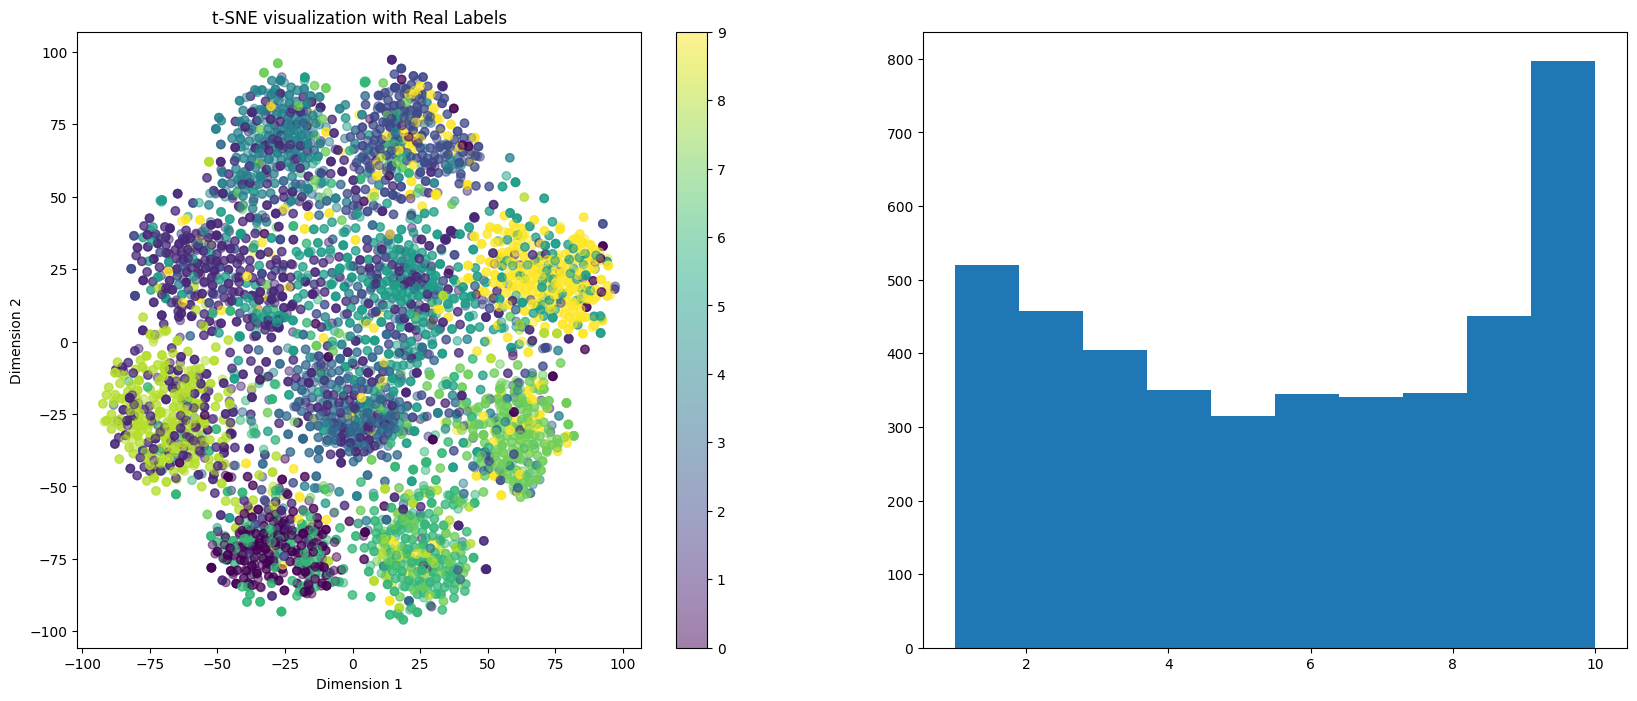

Predicted noise indices: [110, 201, 316, 368, 539, 561, 576, 611, 612, 625, 674, 724, 817, 896, 986, 997, 1008, 1045, 1063, 1139, 1172, 1191, 1243, 1247, 1254, 1400, 1516, 1523, 1533, 1560, 1898, 1952, 2041, 2042, 2130, 2204, 2319, 2381, 2567, 2589, 2631, 2719, 2813, 2855, 2871, 2944, 2981, 3040, 3293, 3367, 3372, 3554, 3697, 3759, 3785, 3831, 3838, 3888, 3895, 3987, 4014, 4138, 4195, 4444, 4571, 4576, 4934, 4951, 5064, 5073, 5081, 5199, 5237, 5249, 5335, 5350, 5353, 5396, 5430, 5617, 5639, 5652, 5756, 5773, 5809, 5979, 6098, 6211, 6271, 6315, 6325, 6330, 6406, 6472, 6635, 6664, 6752, 6762, 6847, 6881, 6978, 6999, 7025, 7028, 7082, 7130, 7133, 7135, 7161, 7207, 7275, 7332, 7359, 7378, 7518, 7533, 7637, 7650, 7819, 7825, 7958, 7977, 8009, 8068, 8087, 8167, 8197, 8211, 8234, 8237, 8376, 8399, 8540, 8601, 8865, 8877, 8973, 9033, 9044, 9067, 9112, 9149, 9162, 9180, 9215, 9216, 9322, 9371, 9515, 9570, 9705, 9741, 9745, 9756, 9767, 9784, 9982, 9992, 9998, 10009, 10156, 10352, 10371, 10435, 1

Epoch 32/1000:   3%|▎         | 33/1000 [57:44<28:12:13, 105.00s/it, val_loss=4.78, val_contrastive=1.25, val_accuracy=49.9, train_loss=3, train_contrastive=1.4, best_accuracy=53, best_loss=4.7]       


Early stopping triggered
Loading best model from checkpoint...


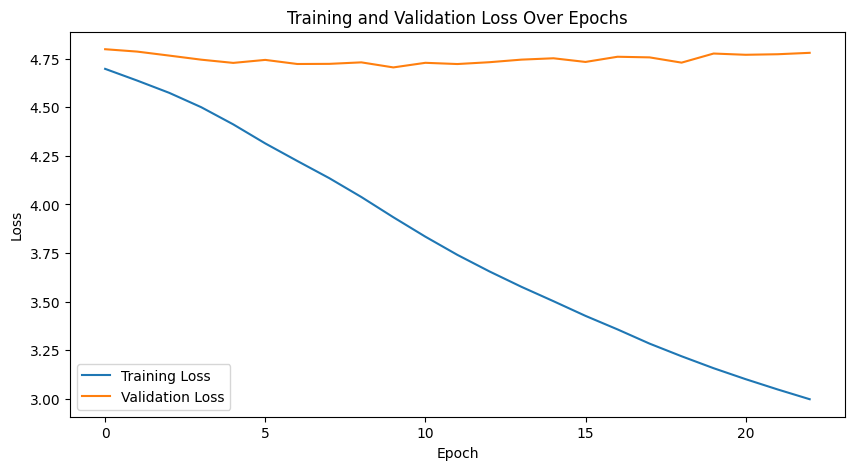

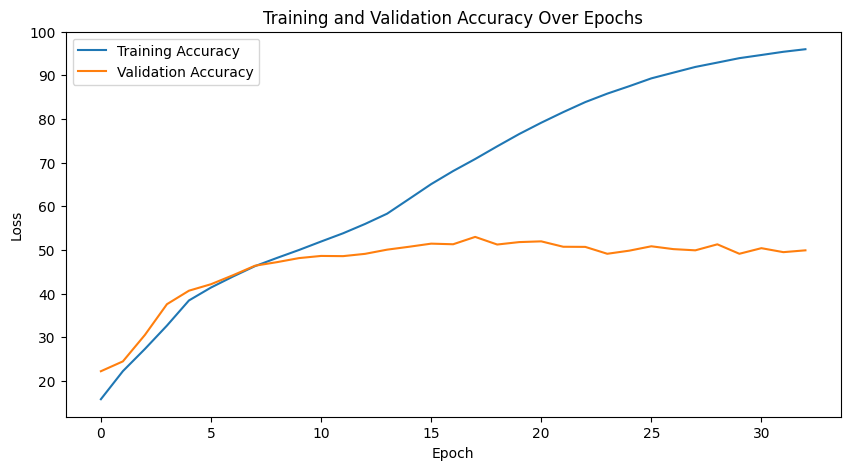

Extracting Embeddings: 100%|██████████| 51/51 [00:02<00:00, 18.32it/s]


Distance between embedding 3104 and 3078: 1.7890
Distance between embedding 3104 and 933: 1.7690
Distance between embedding 3104 and 5327: 1.9461
Distance between embedding 3104 and 835: 1.9219
Distance between embedding 3104 and 4994: 1.7635
Distance between embedding 3104 and 3400: 1.7135
Distance between embedding 3104 and 4234: 1.7319
Distance between embedding 3104 and 3292: 1.6816
Distance between embedding 3104 and 771: 1.8883
Distance between embedding 3104 and 3968: 1.6692
Distance between embedding 3104 and 1312: 1.2194
Distance between embedding 3104 and 4675: 1.7524
Distance between embedding 3104 and 23: 1.8036
Distance between embedding 3104 and 4498: 2.0660
Distance between embedding 3104 and 3358: 1.5500
Distance between embedding 3104 and 1031: 1.8676
Distance between embedding 3104 and 5251: 1.8115
Distance between embedding 3104 and 5881: 1.7631
Distance between embedding 3104 and 6371: 1.6666
Distance between embedding 3078 and 933: 1.4985
Distance between embedding

Testing: 100%|██████████| 51/51 [00:02<00:00, 20.32it/s]


Test Accuracy: 52.99%
Test Precision: 0.53
Test Recall: 0.53
Test F1 Score: 0.53
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 34/1000:   4%|▎         | 35/1000 [1:01:15<28:08:52, 105.01s/it, val_loss=4.56, val_contrastive=1.25, val_accuracy=50.2, train_loss=3.15, train_contrastive=1.42, best_accuracy=52.8, best_loss=4.56]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.95it/s]


Test Accuracy: 52.75%
Test Precision: 0.53
Test Recall: 0.53
Test F1 Score: 0.52
Model saved to cifar10(40)/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 11/1000:   1%|          | 11/1000 [19:25<29:01:36, 105.66s/it, val_loss=4.98, val_contrastive=1.22, val_accuracy=40.7, train_loss=4.9, train_contrastive=1.19, best_accuracy=40.7, best_loss=4.98]

In [ ]:
noise_cleaner.clean()

### Test

In [1]:
from models.final_model_tester import CIFAR10FinalModelTester

transform_train = transforms.Compose([
    transforms.RandomRotation(degrees=15), # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5), # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

cleaned_path = '/kaggle/input/cleanercifar/Advanced-CIFAR10.pkl'
dirty_path = '/kaggle/input/dirtycifar/dirty.pkl'
tester = CIFAR10FinalModelTester(train_dataset_path=cleaned_path, train_transform=transform_train, test_transform=test_transform, 
                                 train_batch_size=512, val_batch_size=512, test_batch_size=512, pretrained=False, lr=0.001, weight_decay=0.0007, 
                                 use_default_train=False, patience=20, warmup_epochs=5, use_lr_scheduler=False, freeze=False, smoothing=0.1)

# lr=0.00015, patience=5, weight_decay=0.00075, 

Dataset size: 43345
Files already downloaded and verified


In [2]:
tester.train(100)

Epoch 1/100:   2%|▏         | 3/170 [00:06<06:15,  2.25s/it]


KeyboardInterrupt: 

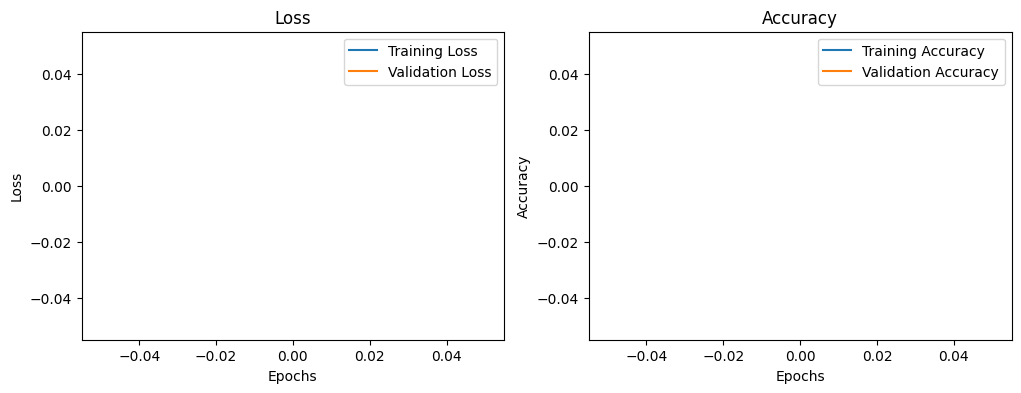

In [7]:
tester.plot_metrics()

In [ ]:
tester.test()

### Etc

In [9]:
from models.dataset import CleanDatasetLoader

cleaned_dataset = CleanDatasetLoader('cleaned/Advanced-CIFAR10.pkl', None)

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
img, label = cleaned_dataset[0]
img = Image.fromarray(img)
img.show()

# # Convert the image tensor to a PIL Image
# try:
#     img = transforms.ToPILImage()(img)
# except:
#     a =2

# # Plot the image
# plt.imshow(img)
# plt.title(f'Label: {label.item()}')
# plt.axis('off')  # Hide axes
# plt.show()

## TMP

In [ ]:
import torch
import torch.functional as F
import torch.nn.functional as F
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
from torchvision.models import resnet34, ResNet34_Weights
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import wide_resnet50_2, Wide_ResNet50_2_Weights
from torchvision.models import vgg16_bn, VGG16_BN_Weights
from torchvision.models import vgg19_bn, VGG19_BN_Weights
from models.preact import *
from models.cnn import CustomCNN
from models.dla import DLA
from torchsummary import summary

pre_trained = True
base_model = nn.Sequential(
                nn.Conv2d(3, 32, 3, stride=1, padding=1),  #out ->  b, 16, 14, 14
                nn.ReLU(True),
                nn.MaxPool2d(kernel_size=2, stride=2),  #out -> b, 16, 8, 8
                
                nn.Conv2d(32, 64, 3, stride=1, padding=1),  #out -> b, 8, 8, 8
                nn.ReLU(True),
                nn.MaxPool2d(kernel_size=2, stride=2, padding=1),  #out -> b, 8, 5, 5
                nn.Flatten(),
                
                nn.Linear(5184, 256),
                nn.ReLU(),
                )
base_model.fc = nn.Flatten()

base_model = base_model.cuda()
if hasattr(base_model, 'fc'):
    base_model.fc = nn.Flatten()
    feature_extractor = base_model
else:
    feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
summary(feature_extractor, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
         MaxPool2d-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 64, 16, 16]          18,496
              ReLU-5           [-1, 64, 16, 16]               0
         MaxPool2d-6             [-1, 64, 9, 9]               0
           Flatten-7                 [-1, 5184]               0
            Linear-8                  [-1, 256]       1,327,360
              ReLU-9                  [-1, 256]               0
          Flatten-10                  [-1, 256]               0
Total params: 1,346,752
Trainable params: 1,346,752
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.90
Params size (MB): 5.14
Estimat

## New Expreiment

In [ ]:
from models.vae import *  # Import your custom VAE model and loss
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from models.dataset import CustomDataset  # Assuming CustomDataset is custom-made

# Define transformations with augmentations
augmented_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomCrop(size=64, padding=4),  # Random cropping with padding
    transforms.AutoAugment(policy=transforms.autoaugment.AutoAugmentPolicy.CIFAR10),  # AutoAugment for CIFAR10
    transforms.Grayscale(num_output_channels=3),  # Convert to grayscale with 3 channels to match input
    transforms.ToTensor()  # Convert to tensor
])

# Load CIFAR10 dataset
train_dataset = datasets.CIFAR10(root='data', train=True, download=False)

# Wrap the CIFAR10 dataset using CustomDataset (assuming it's necessary)
dataset = CustomDataset(train_dataset, transform=augmented_transform)

# DataLoader with batch size and shuffling (shuffle=True for training)
train_loader = DataLoader(dataset, batch_size=800, shuffle=True)

# Initialize the VAE loss function (MSE reconstruction loss)
vae_loss_fn = VAELoss(reconstruction_loss_type="mse")

# Define VAE parameters
latent_dim = 20
hidden_dim = 256
output_dim = 32*32  # Output feature dimension from ResNet18

# Initialize the VAE model
vae = VAE(latent_dim)

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vae = vae.to(device)

# Optimizer (Adam)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Training loop function
def train(epoch):
    vae.train()  # Set the model to training mode
    train_loss = 0  # Track the total loss
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)  # Move the data to the GPU if available
        optimizer.zero_grad()  # Reset the gradients
        recon_batch, mu, logvar = vae(data)  # Forward pass through VAE
        loss = vae_loss_fn(recon_batch, data, mu, logvar)  # Calculate VAE loss
        loss.backward()  # Backpropagation
        train_loss += loss.item()  # Accumulate the loss
        optimizer.step()  # Update model parameters

    # Print the average loss for the epoch
    print(f'Epoch {epoch}, Loss: {train_loss / len(train_loader.dataset)}')

# Train the VAE model for 10 epochs
for epoch in range(1, 11):
    train(epoch)

Epoch 1, Loss: 116613.89822875
Epoch 2, Loss: 652.5716528125
Epoch 3, Loss: 568.0243871875
Epoch 4, Loss: 514.767764375
Epoch 5, Loss: 486.0452425
Epoch 6, Loss: 462.51460625
Epoch 7, Loss: 445.3024959375
Epoch 8, Loss: 435.4643065625
Epoch 9, Loss: 421.8742640625
Epoch 10, Loss: 410.498935625


In [ ]:
for epoch in range(11, 251):
    train(epoch)

Epoch 11, Loss: 201.806855
Epoch 12, Loss: 202.6633796875
Epoch 13, Loss: 201.838084375
Epoch 14, Loss: 201.56012296875
Epoch 15, Loss: 201.4204365625
Epoch 16, Loss: 200.68404078125
Epoch 17, Loss: 201.663695
Epoch 18, Loss: 200.3300196875
Epoch 19, Loss: 199.64572921875
Epoch 20, Loss: 199.5438884375
Epoch 21, Loss: 200.0736596875
Epoch 22, Loss: 199.000961875
Epoch 23, Loss: 198.2702909375
Epoch 24, Loss: 198.83876625
Epoch 25, Loss: 198.64641234375
Epoch 26, Loss: 198.174250625
Epoch 27, Loss: 198.654705
Epoch 28, Loss: 197.083101875
Epoch 29, Loss: 197.42817328125
Epoch 30, Loss: 198.018560625
Epoch 31, Loss: 198.42947609375
Epoch 32, Loss: 197.05003609375
Epoch 33, Loss: 196.3795140625
Epoch 34, Loss: 196.21175421875
Epoch 35, Loss: 195.6715984375
Epoch 36, Loss: 195.1604253125
Epoch 37, Loss: 194.5808478125
Epoch 38, Loss: 194.105665625
Epoch 39, Loss: 193.917190625
Epoch 40, Loss: 194.8503015625
Epoch 41, Loss: 194.7926415625
Epoch 42, Loss: 194.34278609375
Epoch 43, Loss: 193.

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

def extract_embeddings(vae: VAE, dataloader, device):
    vae.eval()
    embeddings = []
    labels = []
    
    with torch.no_grad():
        for data, targets in dataloader:
            data = data.to(device)
            z = vae.latent_embedding(data)
            embeddings.append(z.cpu().numpy())
            labels.append(targets.numpy())

    embeddings = np.concatenate(embeddings, axis=0)
    labels = np.concatenate(labels, axis=0)
    return embeddings, labels

def apply_tsne(embeddings):
    tsne = TSNE(n_components=2, random_state=0)
    embeddings_2d = tsne.fit_transform(embeddings)
    return embeddings_2d

def plot_embeddings(embeddings_2d, labels):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter)
    plt.title('2D t-SNE of VAE Embeddings')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()


In [ ]:
embeddings, labels = extract_embeddings(vae, train_loader, device)
embeddings_2d = apply_tsne(embeddings)
plot_embeddings(embeddings_2d, labels)

KeyboardInterrupt: 

## Animal10N

In [ ]:
from models.dataset import Animal10NDataset
from models.siamese_tester import SiameseTester
from models.siamese import *
from models.predefined import InstanceDependentNoiseAdder
from torchvision import transforms
from torchvision.datasets import FashionMNIST, CIFAR10, CIFAR100, MNIST
from models.cleaner import NoiseCleaner
from models.predictor import Predictor

train_dataset = Animal10NDataset('data/Animal10N/training')
test_dataset = Animal10NDataset('data/Animal10N/testing')
transform = transforms.Compose([
                                #transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                transforms.RandomCrop(size=64, padding=4),
                                #transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='none', model_save_path="cifar10/resnet34/model_resnet34_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='vgg19-bn', train_noise_level=0, epochs_num=500, train_pairs=200000, 
                             val_pairs=10000, embedding_dimension=128, lr=1e-3, optimizer='Adam', patience=7, transform=transform,
                             weight_decay=0.0005, training_batch_size=450, pre_trained=False, dropout_prob=0.2, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', cnn_size=None)

In [ ]:
noise_cleaner.clean()

Seed: 74


Epoch 17/50:  32%|███▏      | 16/50 [00:40<01:25,  2.52s/it, train_loss=4.99, val_loss=4.96, val_accuracy=12.8]

Early stopping triggered
Loading best model from checkpoint...
best accuracy: 12.75


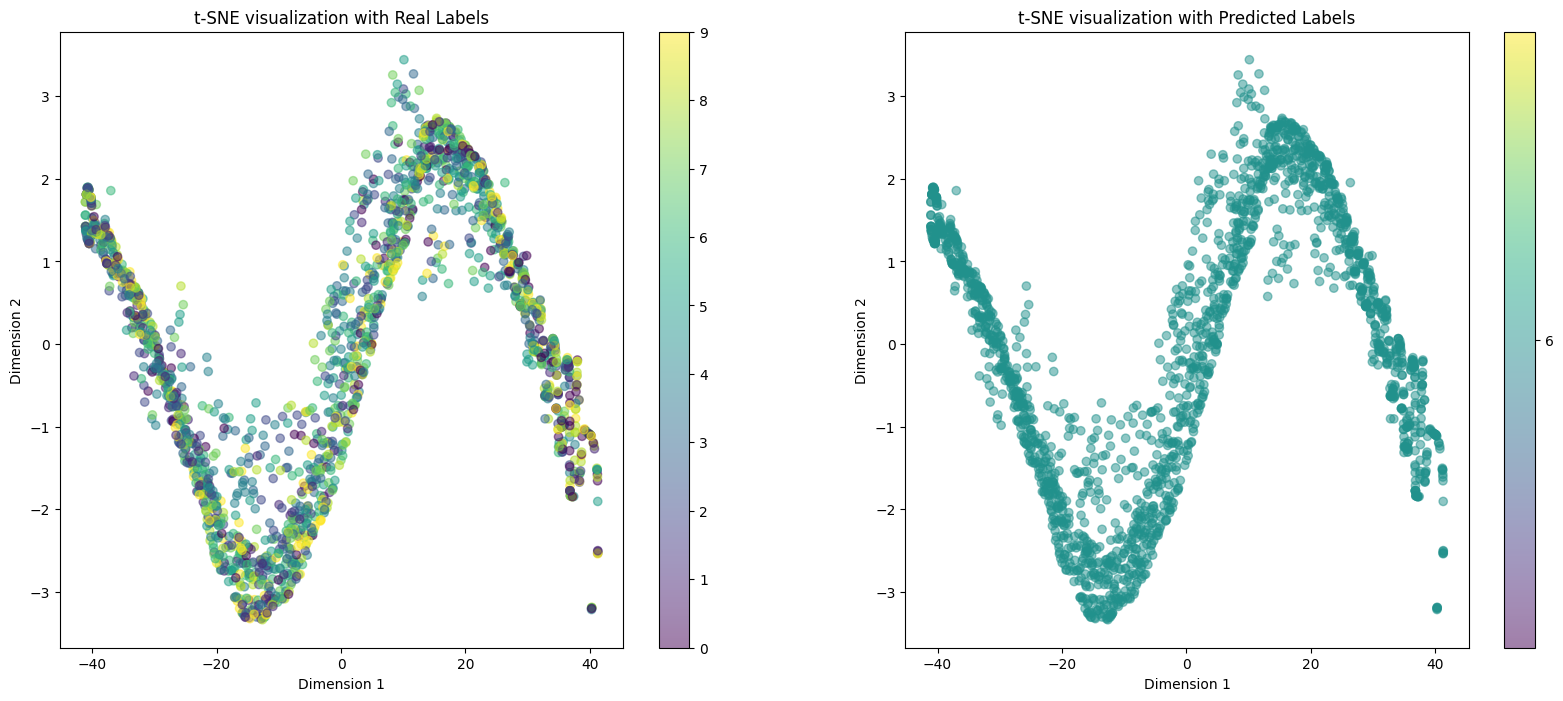

In [ ]:
from models.siamese_tester import SiameseTester
from models.siamese import *
from models.predefined import InstanceDependentNoiseAdder

transform = transforms.Compose([                                
                                transforms.RandomCrop(size=32, padding=4),
                                transforms.RandomHorizontalFlip(),
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
train_dataset = CIFAR10(root='data', train=True, download=False)
train_noise_adder = InstanceDependentNoiseAdder(train_dataset, image_size=3072, ratio=0.2, num_classes=10)
train_noise_adder.add_noise()
tester = SiameseTester(train_dataset, SiameseNetwork, transform=transform, augmented_transform=augmented_transform)
tester.train(50)

In [ ]:
transform = transforms.Compose([transforms.RandomCrop(32, padding=4), transforms.RandomHorizontalFlip(), transforms.ToTensor()])

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = CIFAR10(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, 
                      model_type='resnet18', batch_size=2048, pre_trained=True, weight_decay=0.0005)

In [ ]:
predictor.train(120)

In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 5/5 [00:01<00:00,  4.70it/s]

Test Accuracy: 77.23%


0.7723

In [ ]:
predictor.free_model()

In [ ]:
for i in range(5):
    predictor.train(2)
    predictor.evaluate()